In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [2]:
multi_class = pd.read_parquet('../data/cleaned/multi_class_data.parquet')
binary_class = pd.read_parquet('../data/cleaned/binary_class_data.parquet')

In [3]:
multi_class.columns

Index(['ml_fittype', 'num_of_objects_around_star', 'right_ascension',
       'declination', 'g_band_mag', 'r_band_mag', 'i_band_mag', 'z_band_mag',
       'j_band_mag', 'h_band_mag', 'k_band_mag', 'kepler_band_mag',
       'num_of_transits', 'max_single_event_stat', 'max_multi_event_stat',
       'odd_even_depth_stat', 'limb_dark_co4', 'limb_dark_co3',
       'limb_dark_co2', 'limb_dark_co1', 'transit_signal_to_noise',
       'transit_epoch', 'planet_radius_earth', 'orbit_semimajor_axis',
       'impact', 'transit_duration', 'transit_depth', 'orbital_period',
       'planet_star_radius_ratio', 'planet_star_distance_radius',
       'inclination', 'planet_temp', 'star_temp', 'star_surface_gravity',
       'star_metallicity', 'star_radius', 'star_mass',
       'flux_weight_offset_sig', 'centroid_right_ascension',
       'centroid_declination', 'centroid_right_ascension_offset',
       'centroid_declination_offset', 'planet_star_right_ascension_offset',
       'planet_star_declination_offs

In [4]:
binary_class.columns

Index(['ml_fittype', 'num_of_objects_around_star', 'right_ascension',
       'declination', 'g_band_mag', 'r_band_mag', 'i_band_mag', 'z_band_mag',
       'j_band_mag', 'h_band_mag', 'k_band_mag', 'kepler_band_mag',
       'num_of_transits', 'max_single_event_stat', 'max_multi_event_stat',
       'odd_even_depth_stat', 'limb_dark_co4', 'limb_dark_co3',
       'limb_dark_co2', 'limb_dark_co1', 'transit_signal_to_noise',
       'transit_epoch', 'planet_radius_earth', 'orbit_semimajor_axis',
       'impact', 'transit_duration', 'transit_depth', 'orbital_period',
       'planet_star_radius_ratio', 'planet_star_distance_radius',
       'inclination', 'planet_temp', 'star_temp', 'star_surface_gravity',
       'star_metallicity', 'star_radius', 'star_mass',
       'flux_weight_offset_sig', 'centroid_right_ascension',
       'centroid_declination', 'centroid_right_ascension_offset',
       'centroid_declination_offset', 'planet_star_right_ascension_offset',
       'planet_star_declination_offs

In [4]:
highest_corr_multi = multi_class.corr(numeric_only = True).abs().classification.nlargest(11).index.values.tolist()

In [5]:
highest_corr_multi

['classification',
 'angular_offset_sky',
 'num_of_objects_around_star',
 'planet_temp',
 'star_metallicity',
 'flux_weight_offset_sig',
 'num_of_transits',
 'transit_depth',
 'inclination',
 'transit_signal_to_noise',
 'max_multi_event_stat']

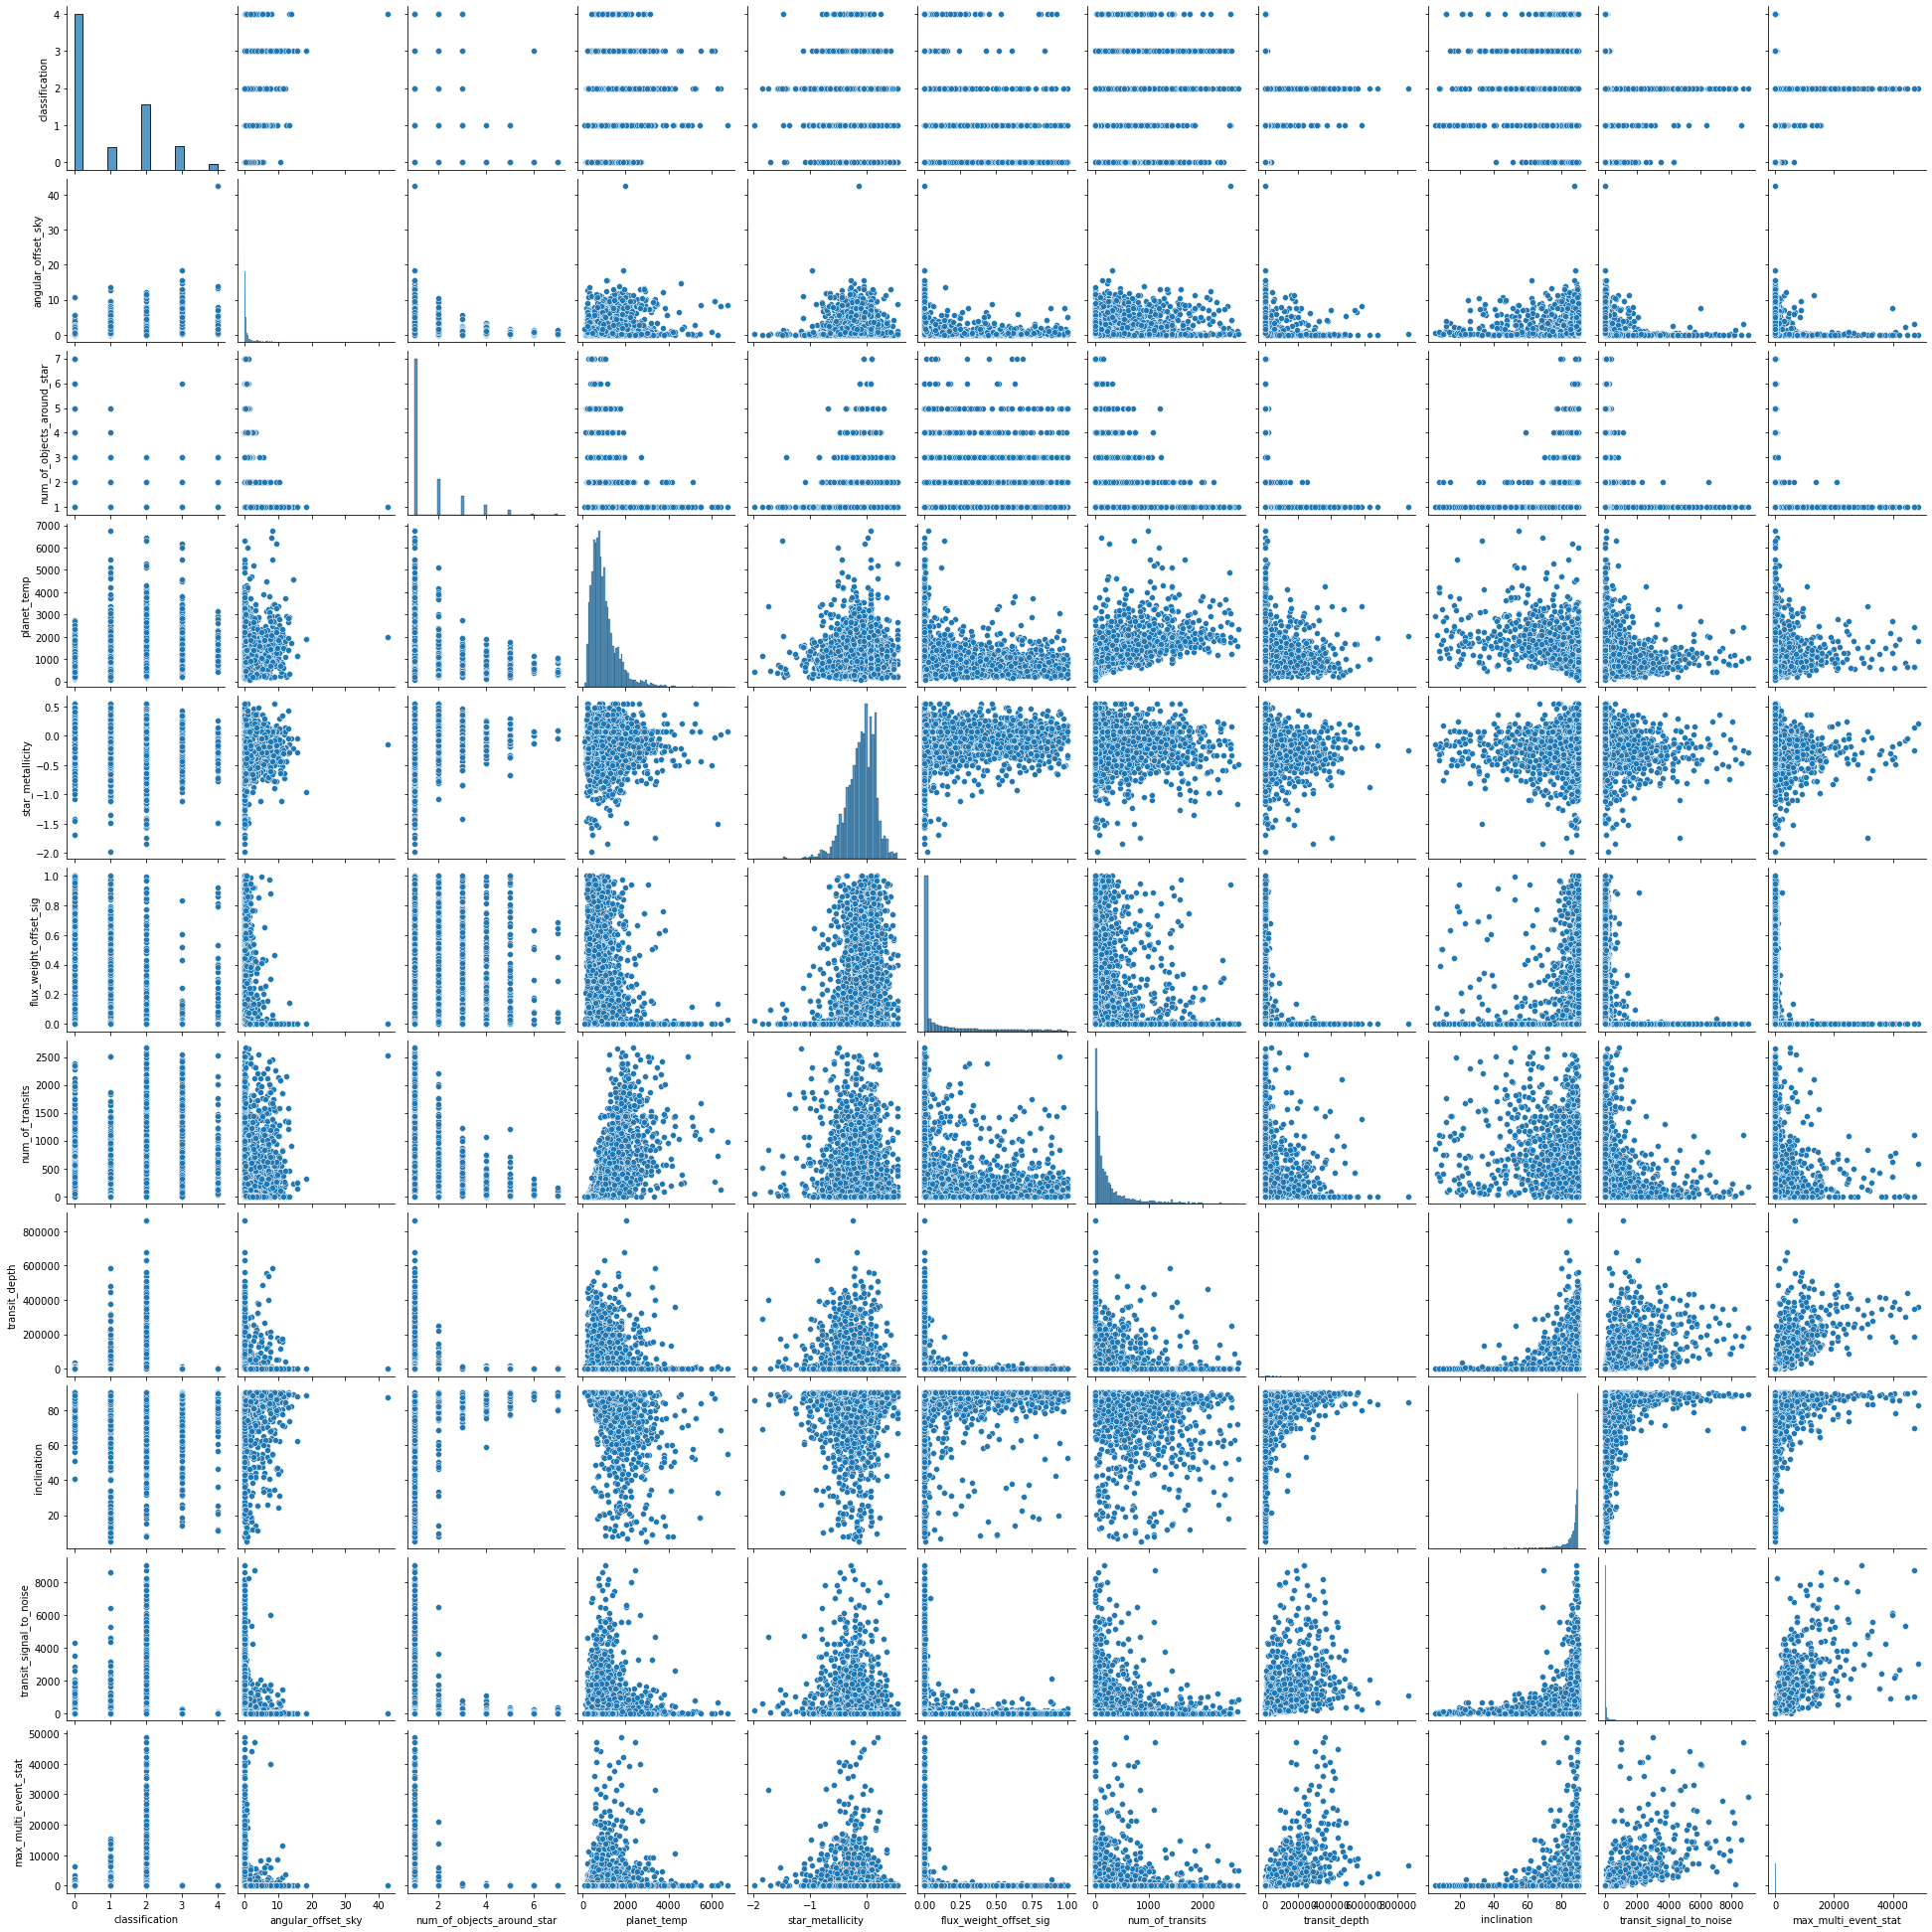

In [6]:
sns.pairplot(multi_class[highest_corr_multi]);

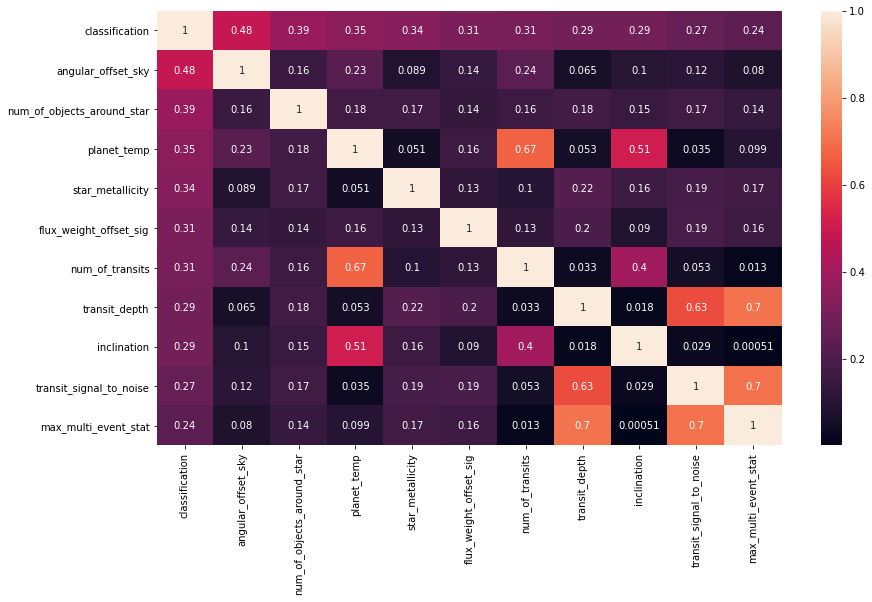

In [7]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(multi_class[highest_corr_multi].corr().abs(), annot = True, ax = ax);

In [5]:
def plot_distributions(frames, column, targets, kde = True, bins = 'auto'):
    num_frames = len(frames)
    
    fig, ax = plt.subplots(num_frames, 2, figsize = (12, 6 * num_frames))
    
    plt.tight_layout(pad = 3.0)
    
    for index, frame in enumerate(frames):
        frame_name = [i for i, j in globals().items() if frame.equals(j)][0]
        row = index
        sns.histplot(data = frame,
                     x = frame[column],
                     hue = frame[targets[index]],
                     palette = 'tab10',
                     multiple = 'layer',
                     alpha = 0.5,
                     kde = kde,
                     bins = bins,
                     ax = ax[row][0]);
        ax[row][0].set_title('{} : {} Histogram'.format(frame_name, column));
        ax[row][0].set_xlabel(column);
        
        sns.boxplot(data = frame,
                    x = frame[column],
                    y = frame[targets[index]],
                    orient = 'h',
                    ax = ax[row][1]);
        ax[row][1].set_title('{} : {} Boxplot'.format(frame_name, column));
        ax[row][1].set_xlabel(column);
    
    return

In [6]:
numerical_columns = multi_class.drop(['classification', 'ml_fittype'], axis = 1).columns

In [68]:
numerical_columns.size

48

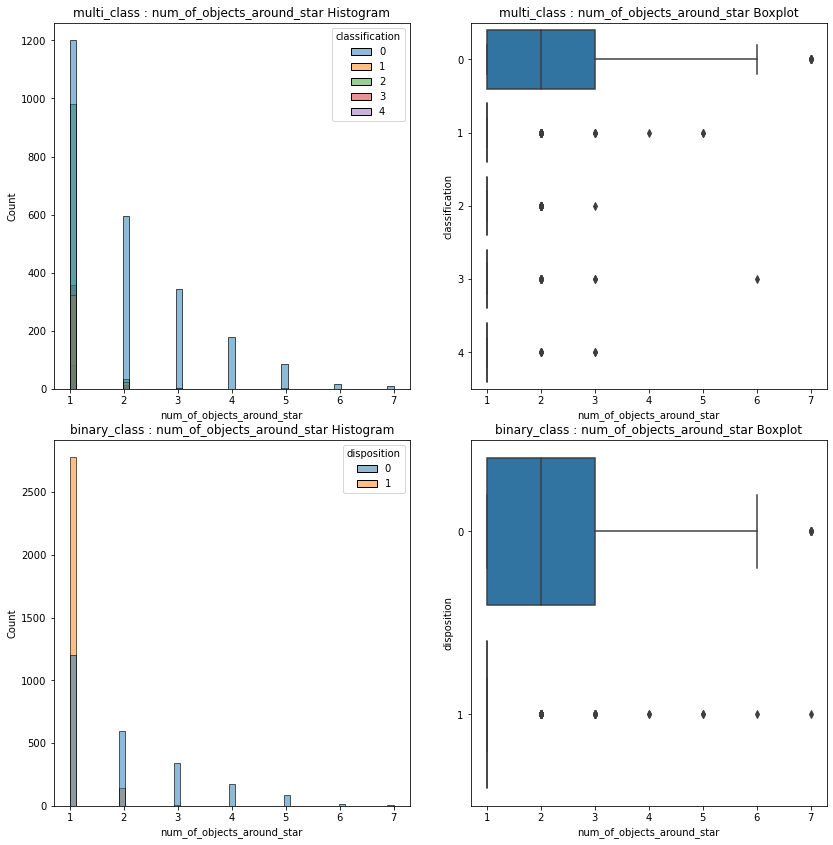

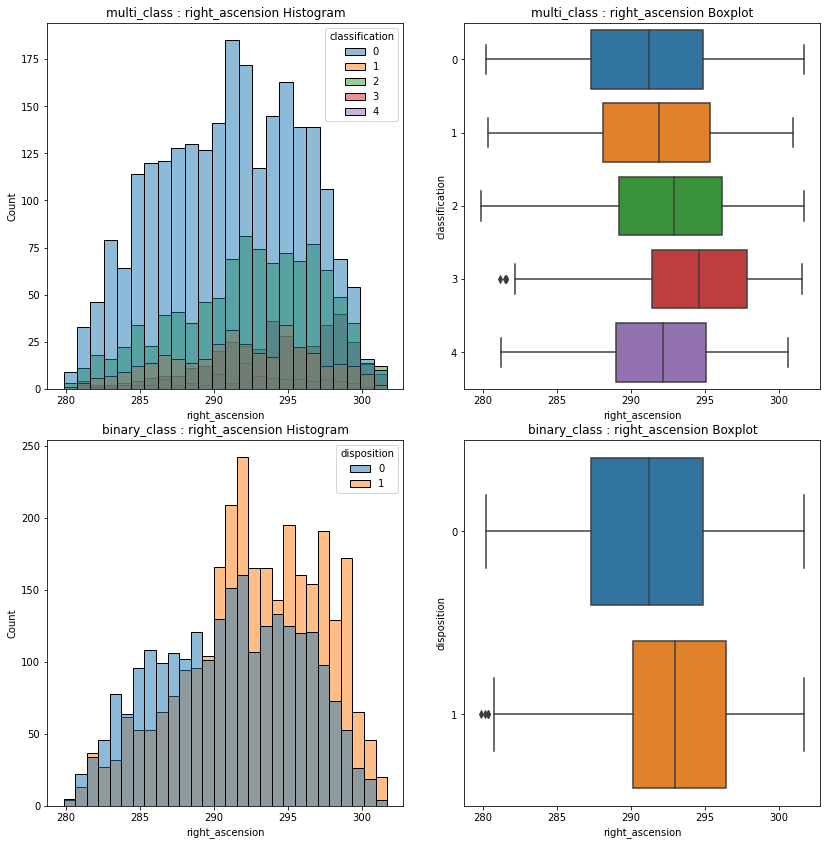

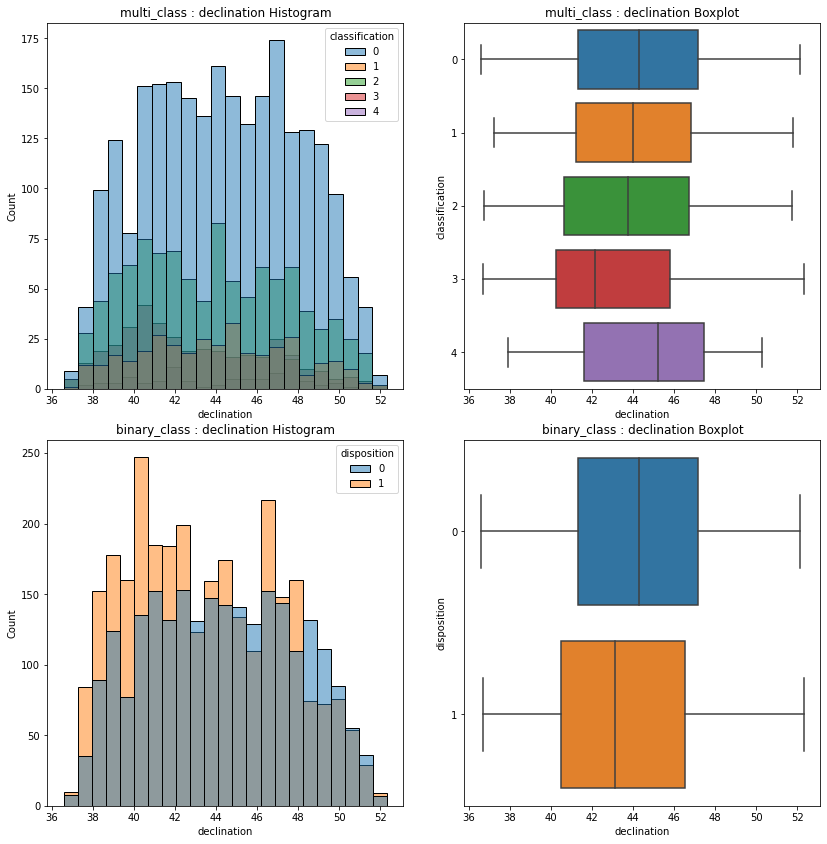

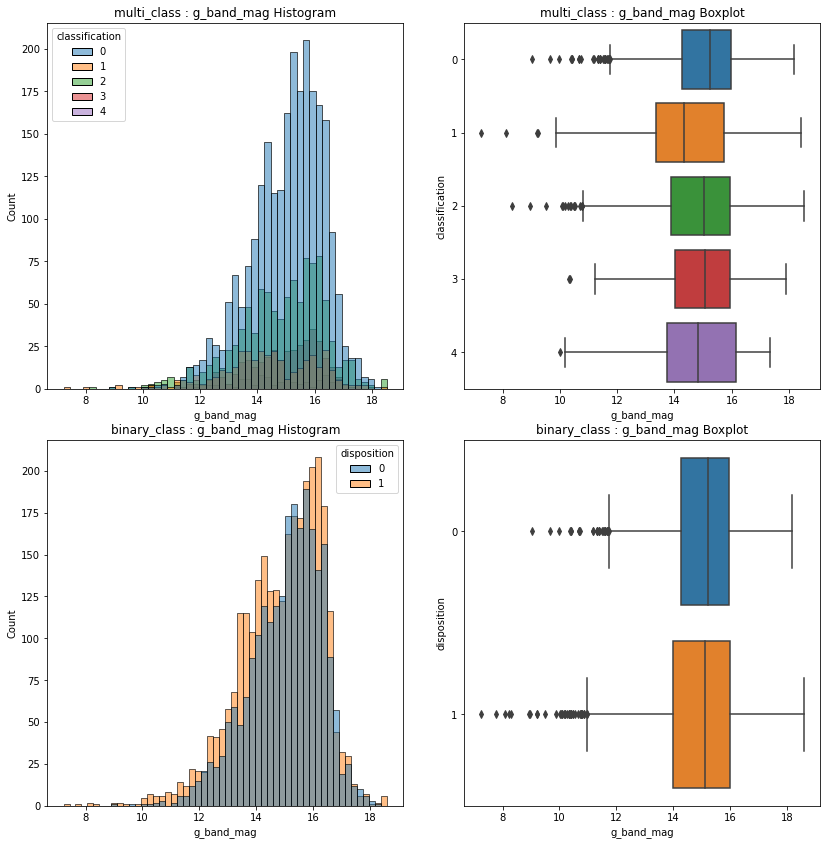

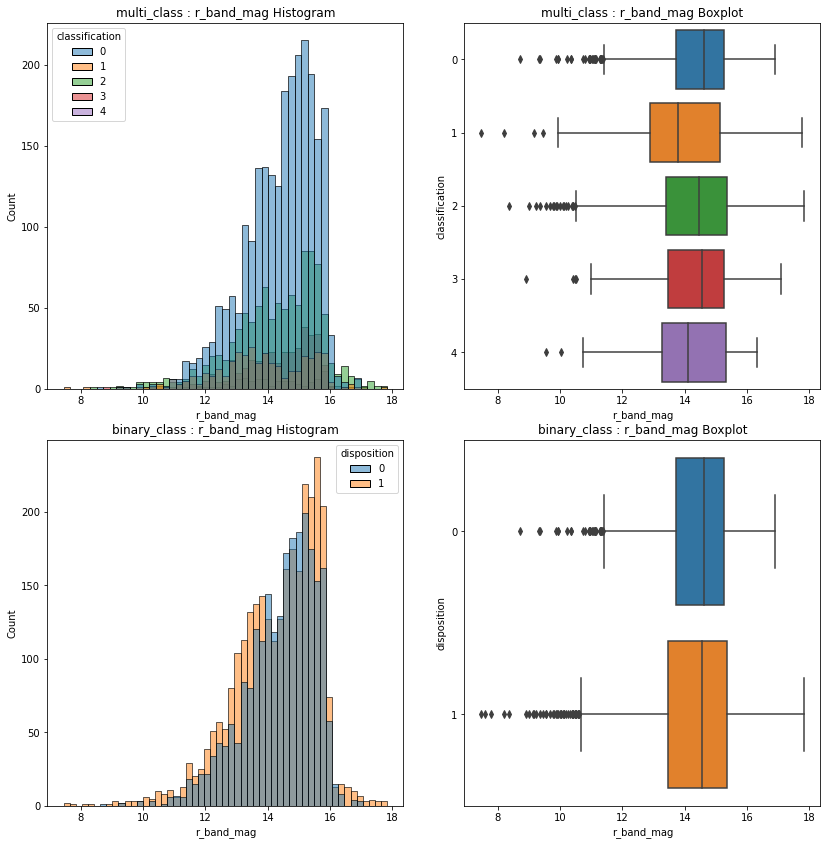

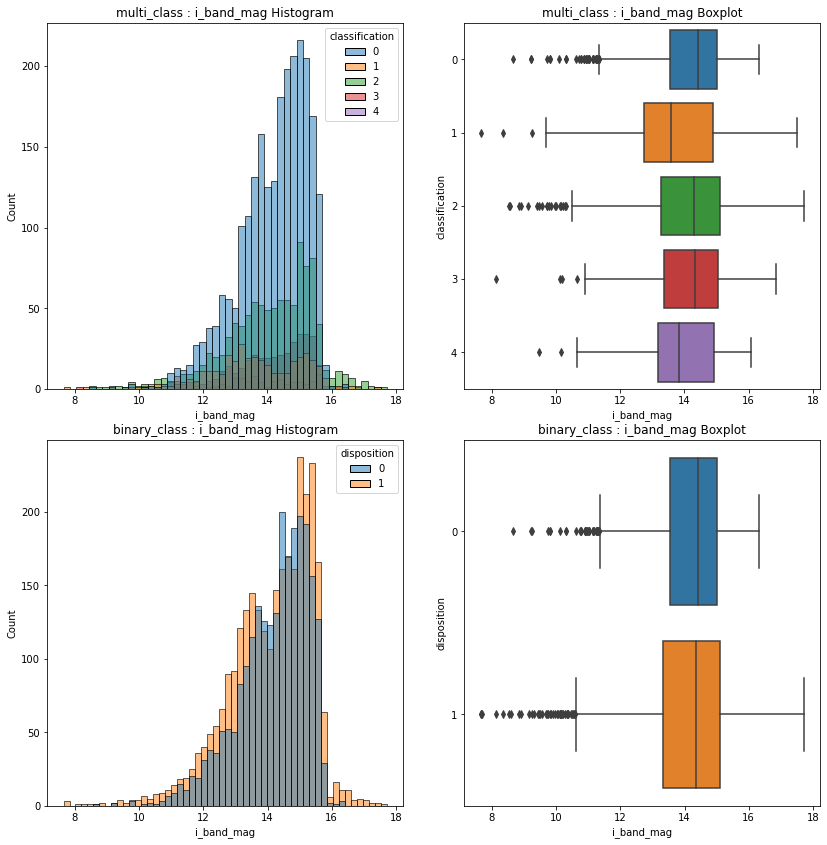

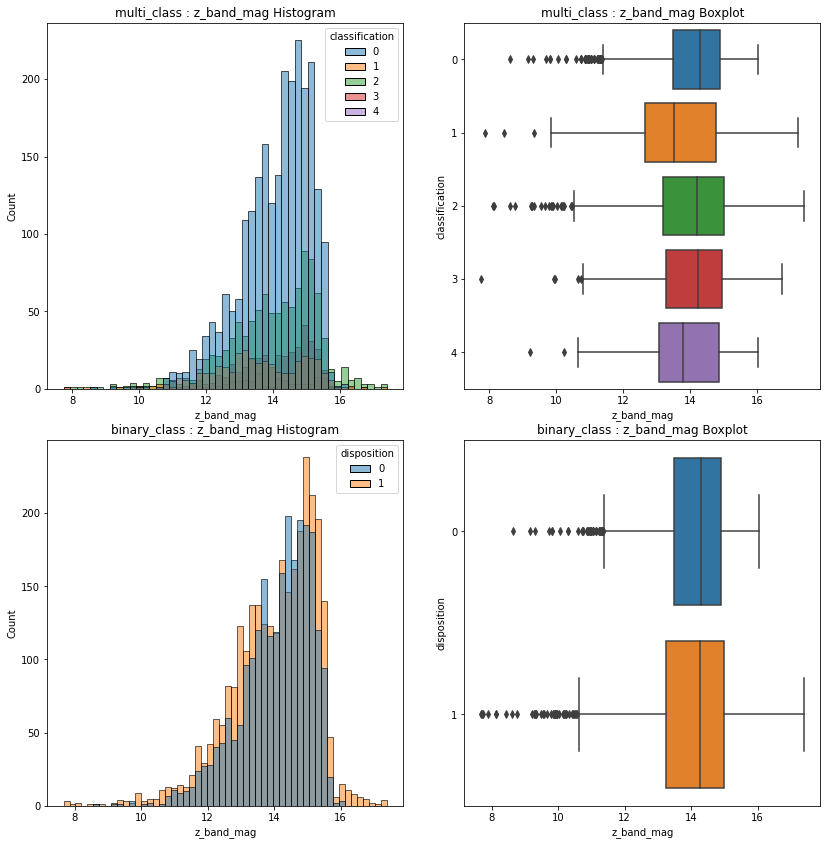

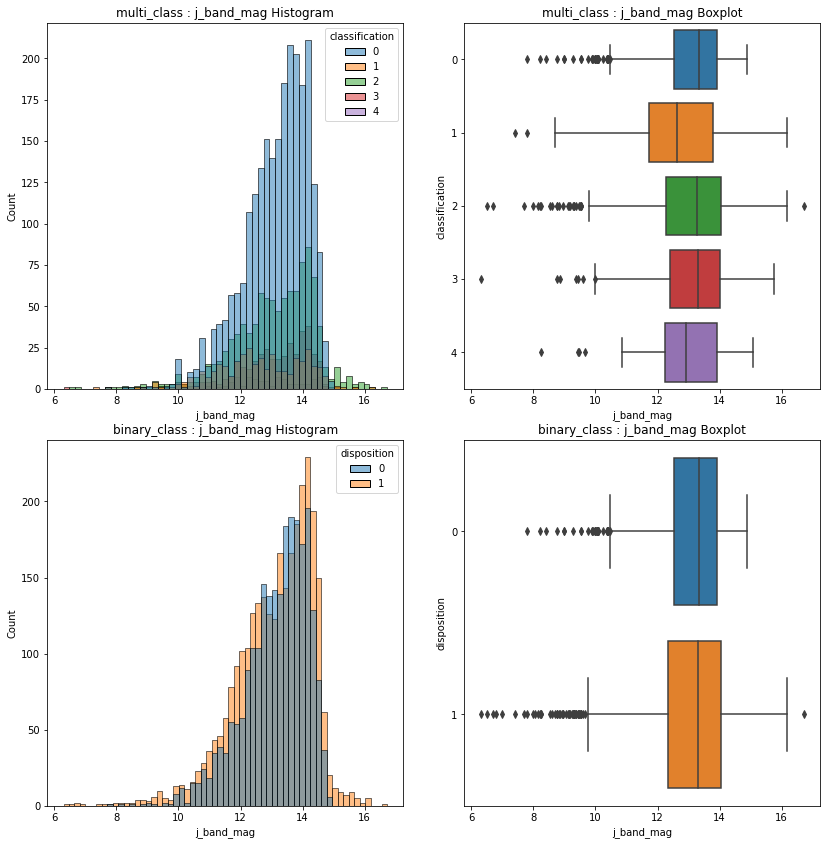

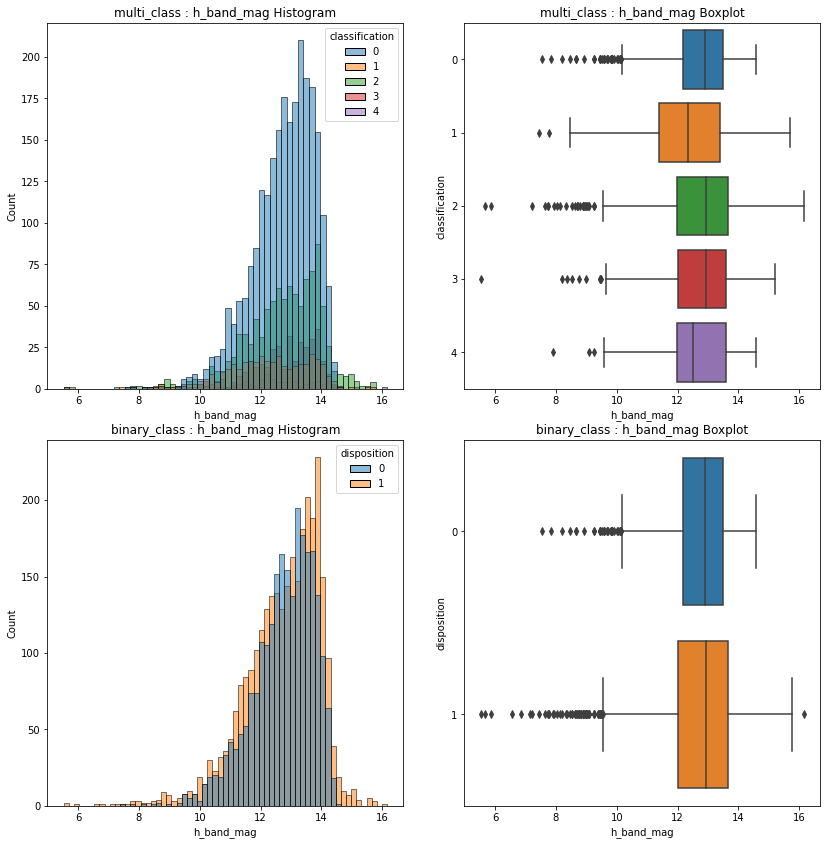

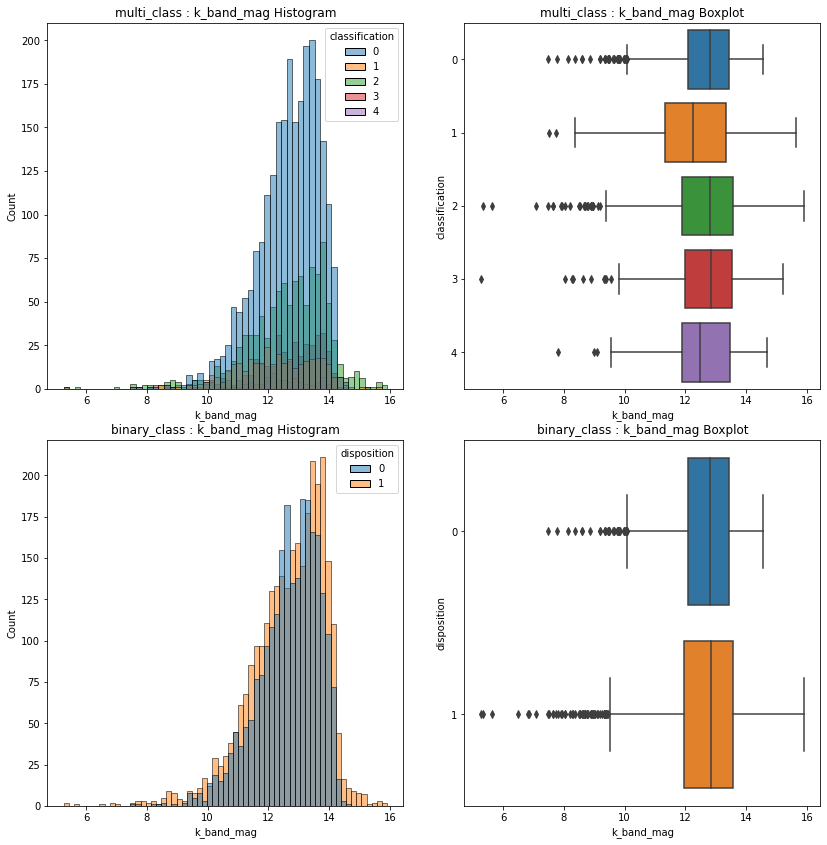

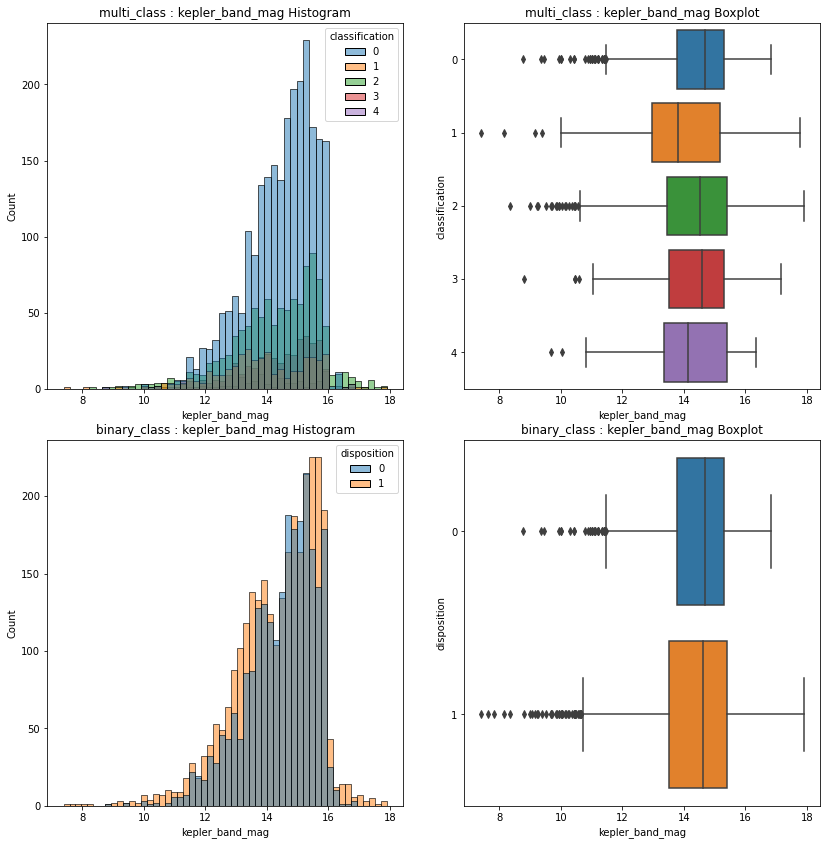

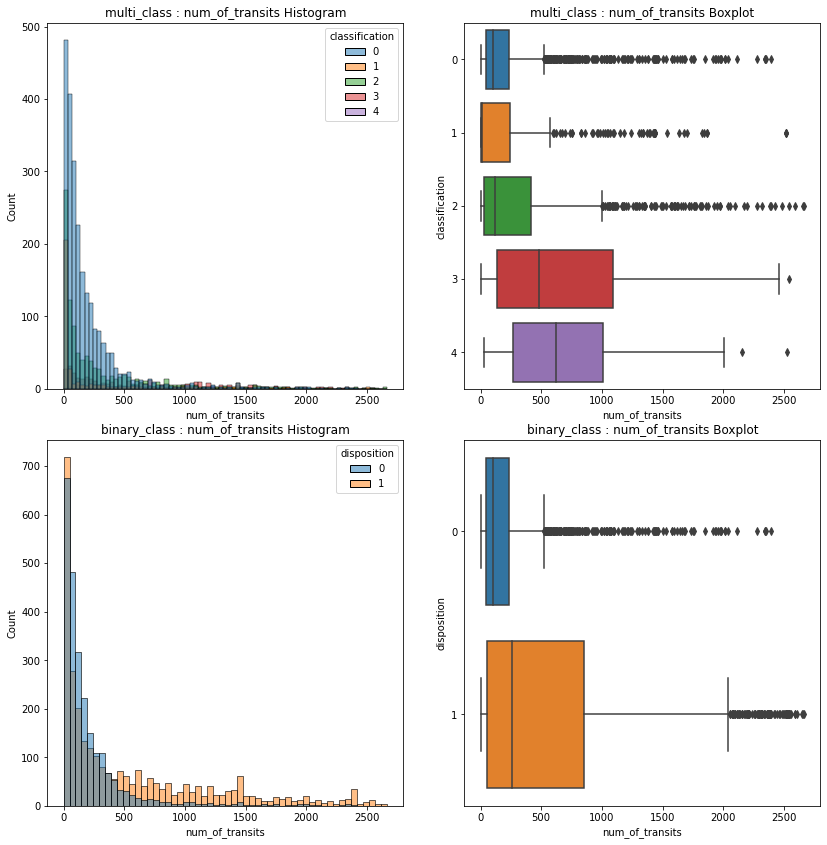

In [79]:
for column in numerical_columns[0:12]:
    plot_distributions([multi_class, binary_class], column, ['classification', 'disposition'], kde = False)

In [81]:
plt.close('all')

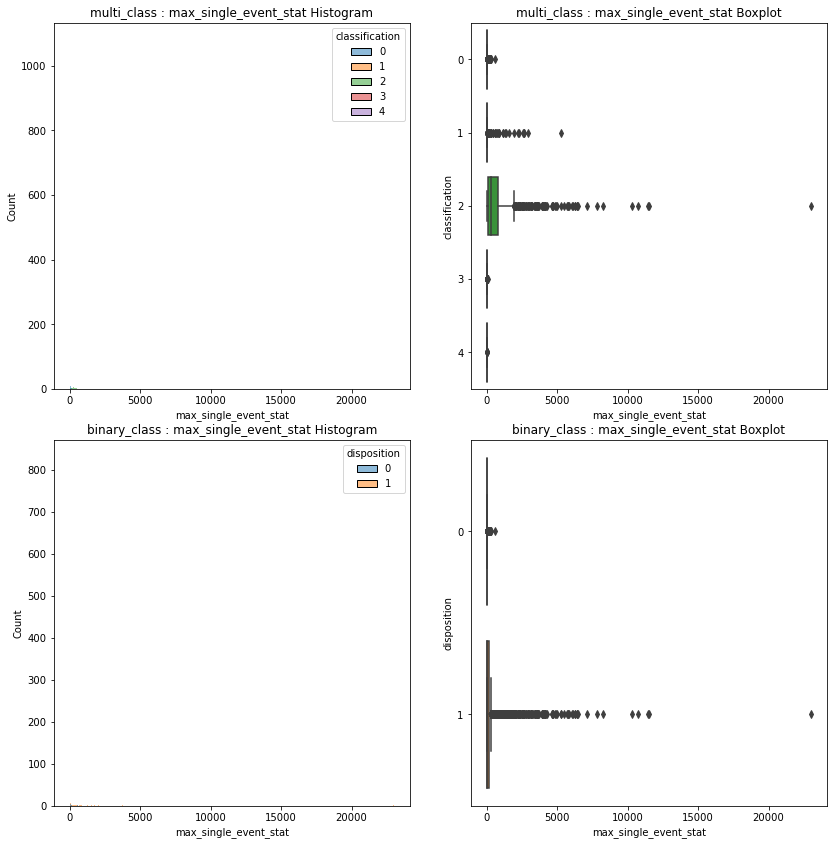

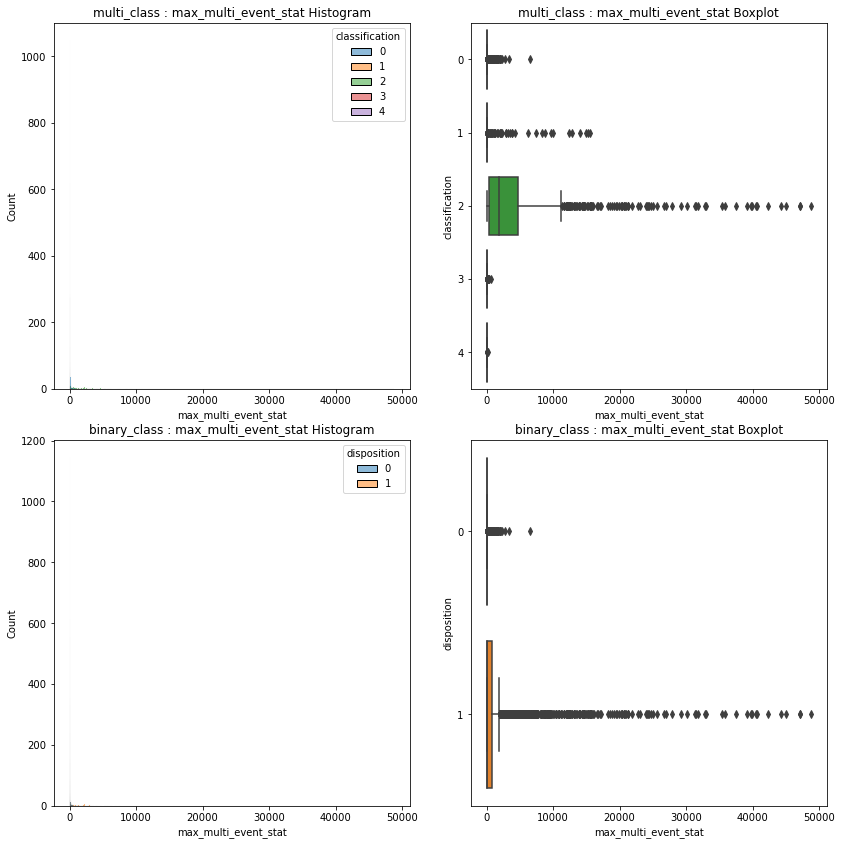

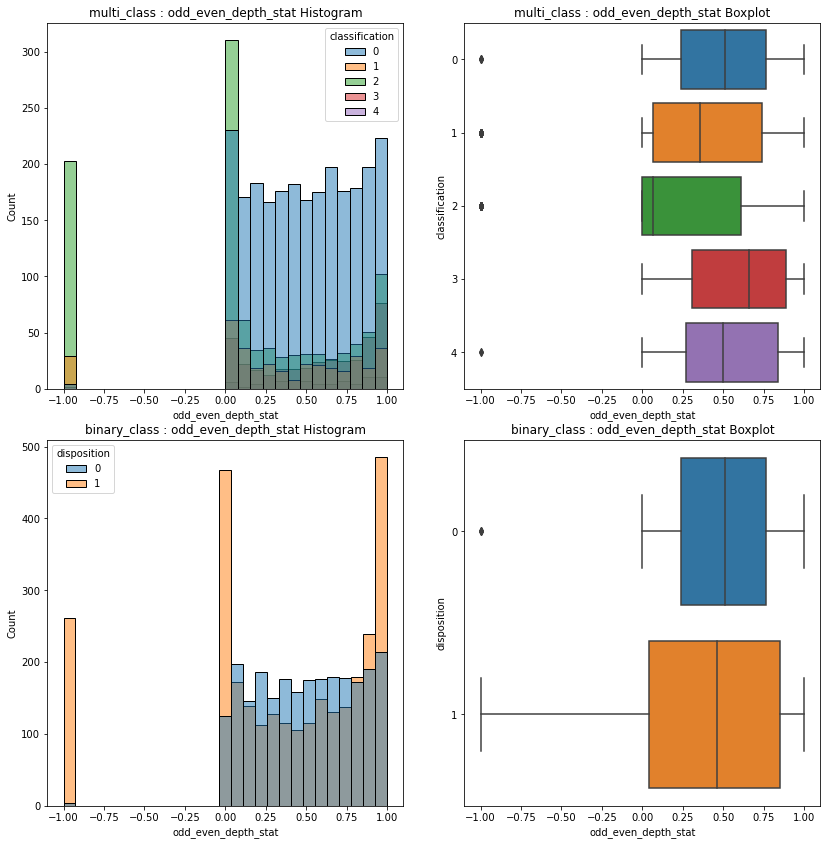

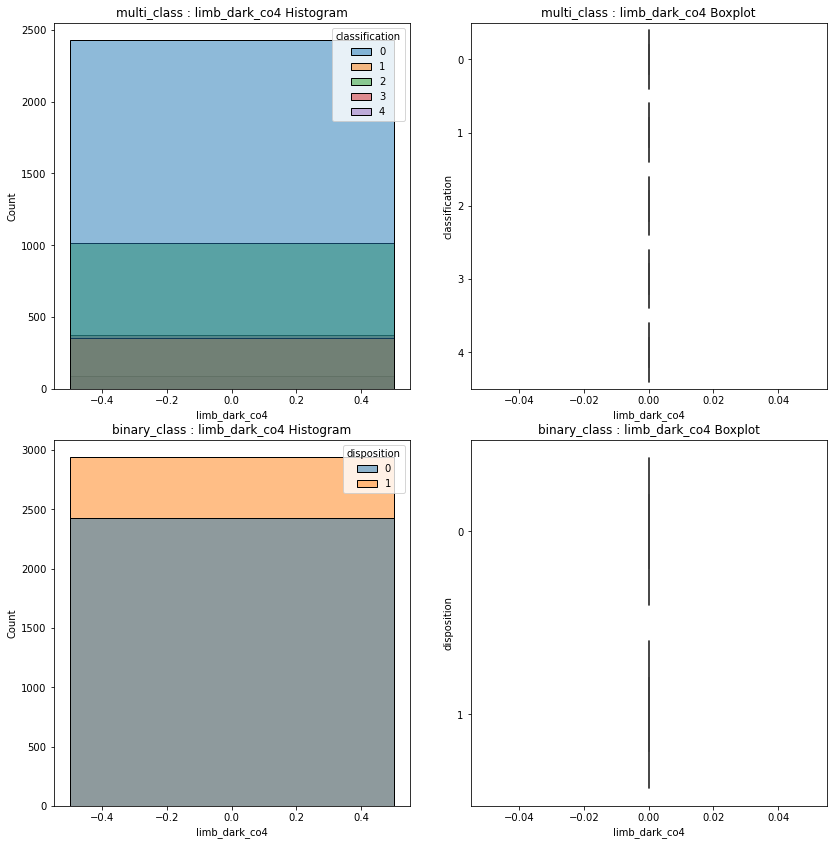

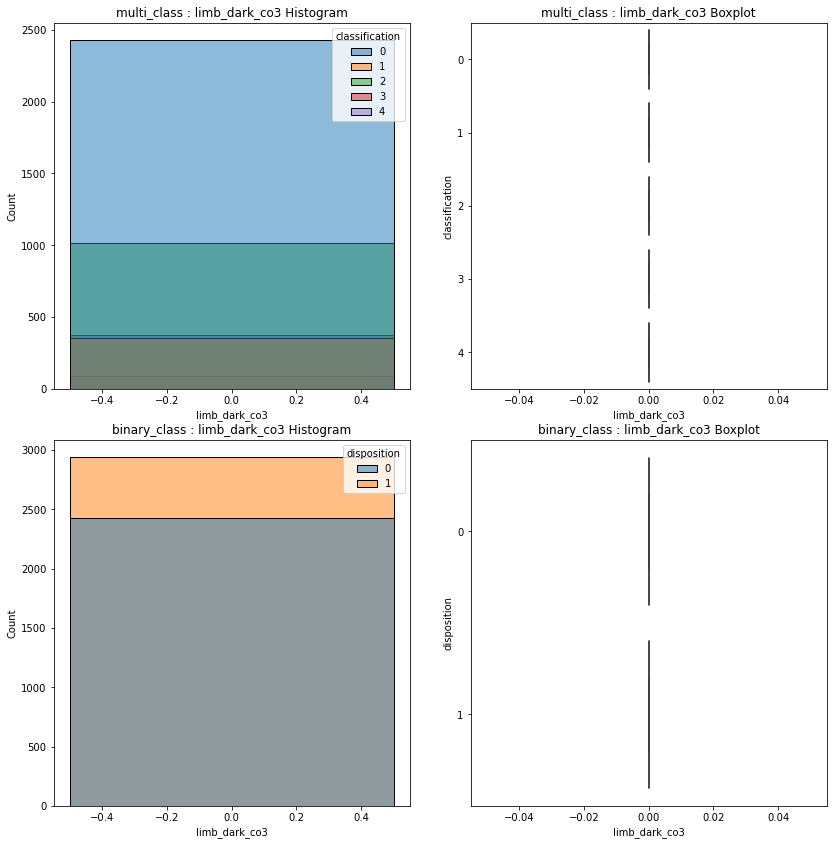

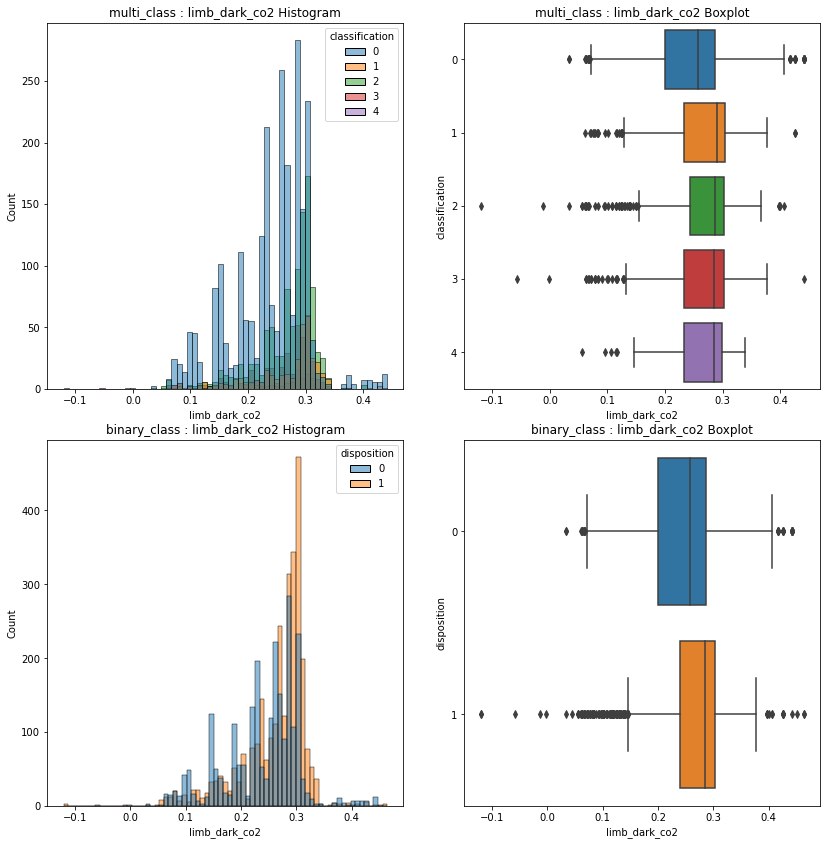

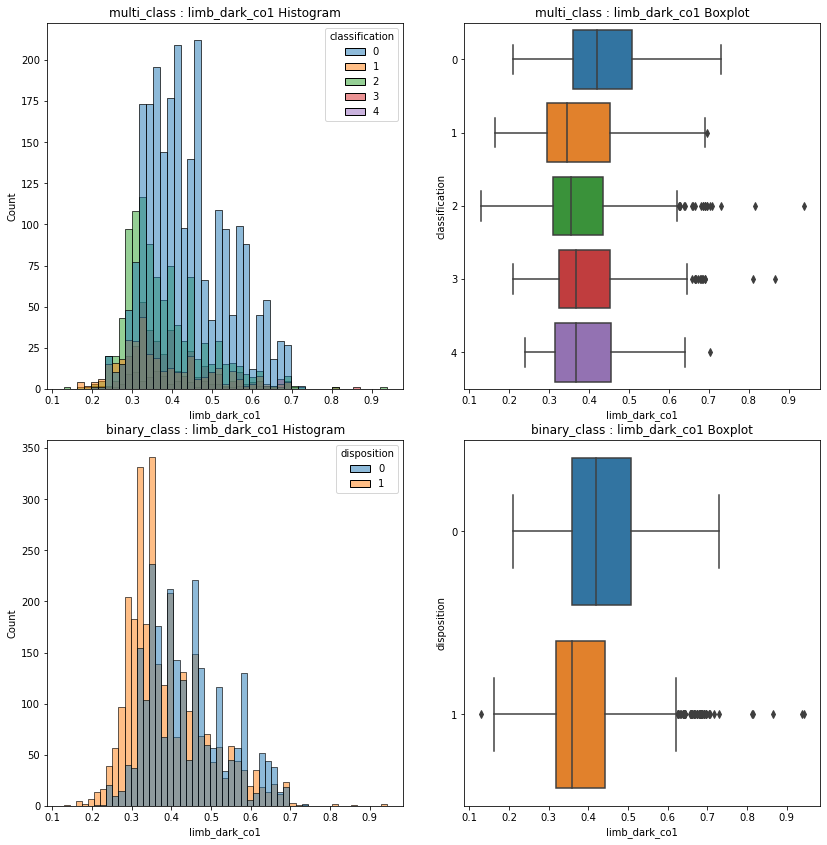

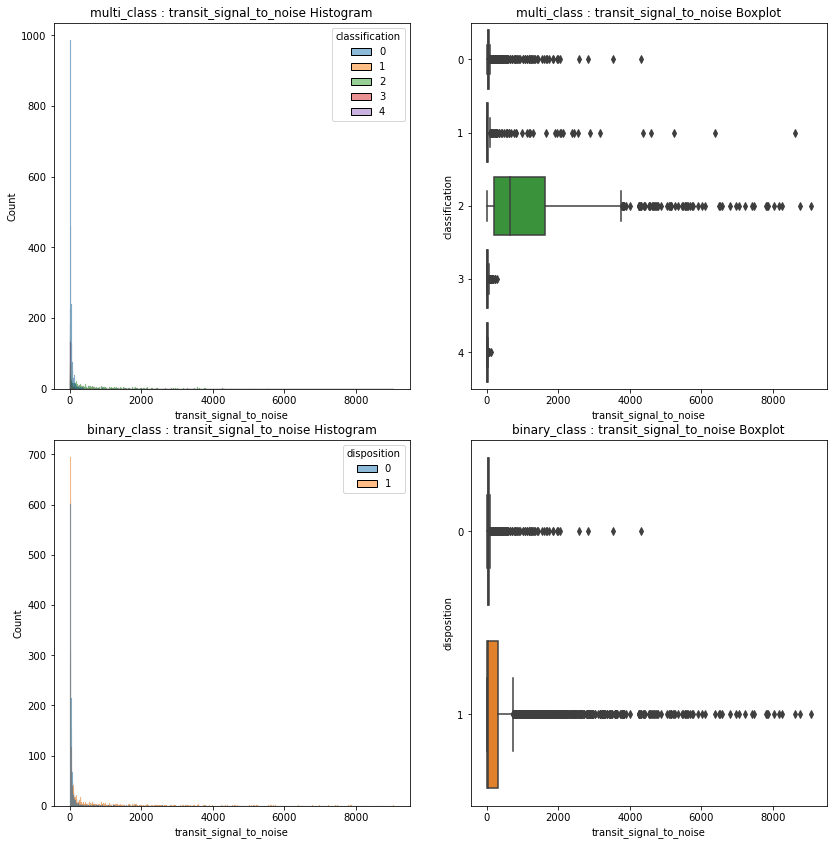

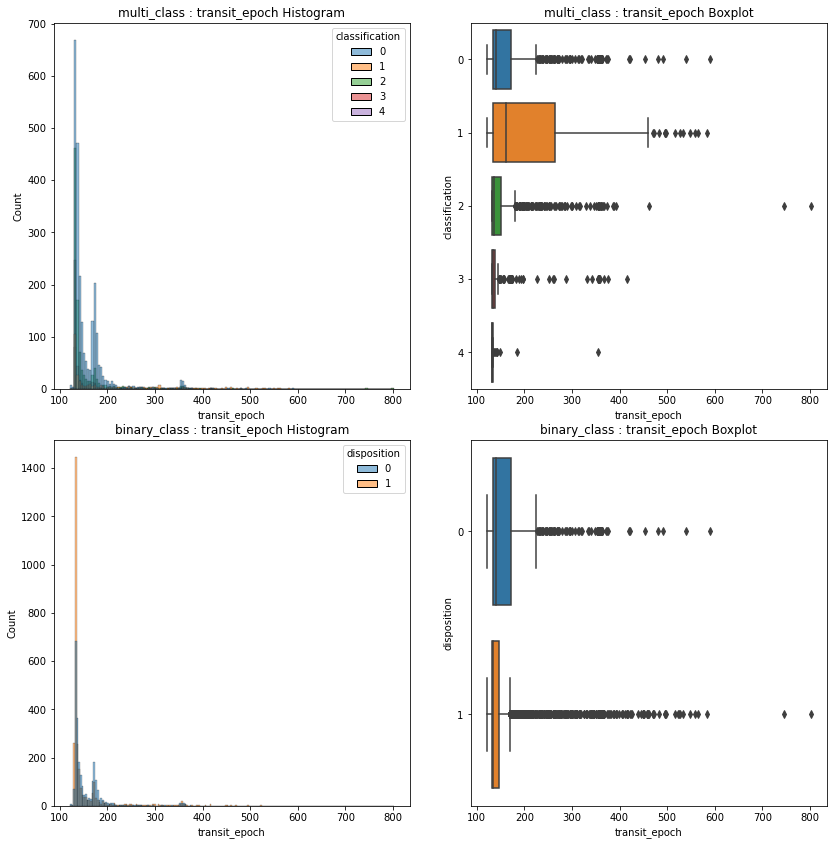

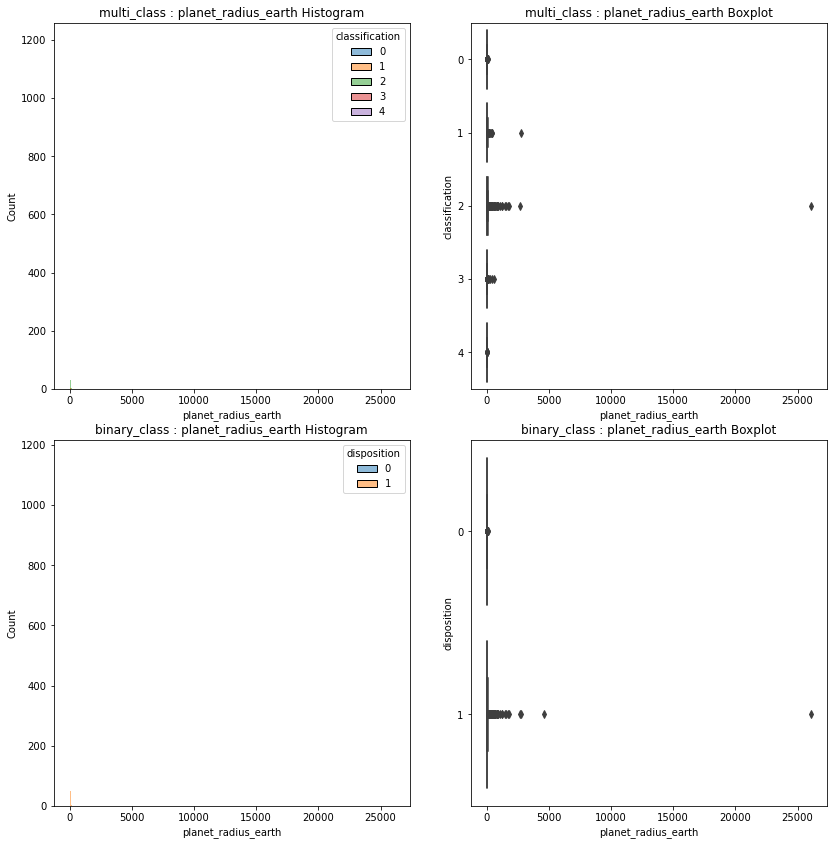

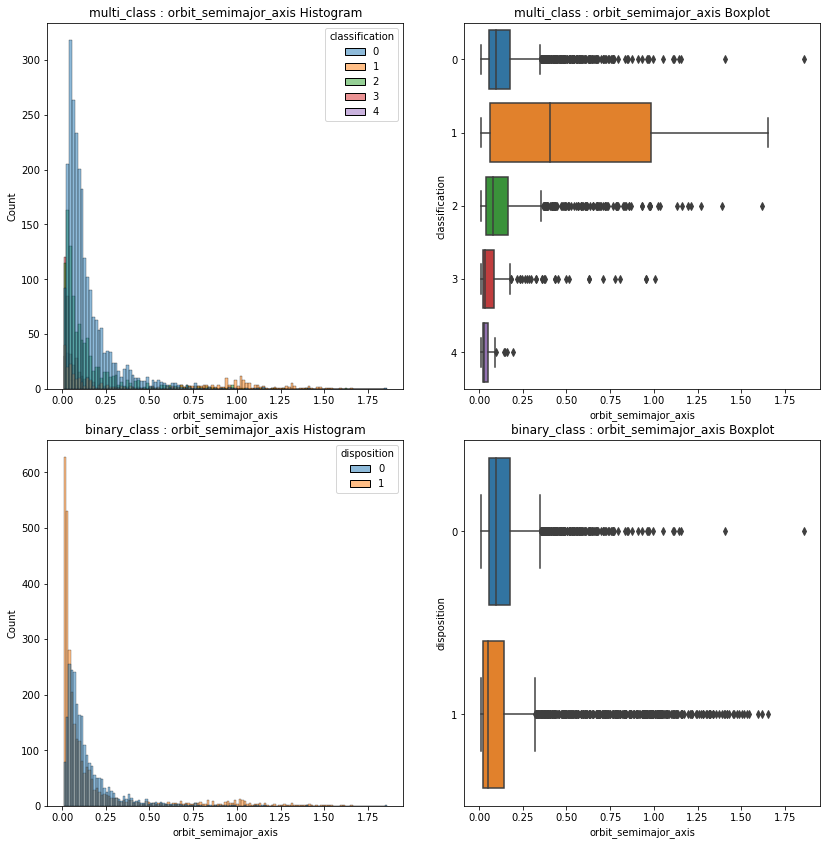

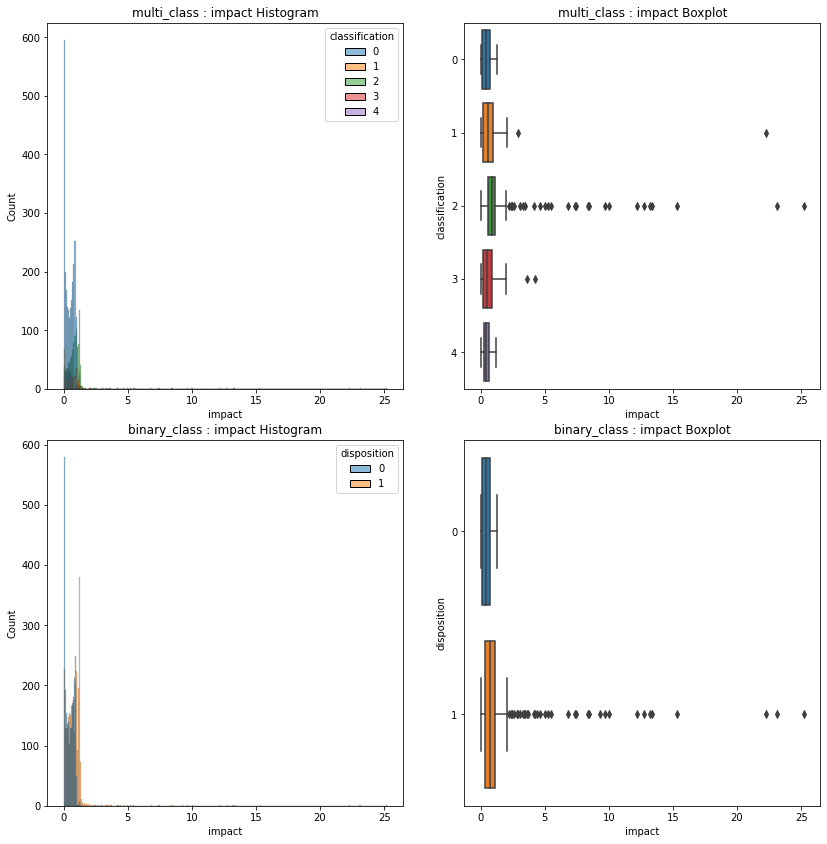

In [82]:
for column in numerical_columns[12:24]:
    plot_distributions([multi_class, binary_class], column, ['classification', 'disposition'], kde = False)

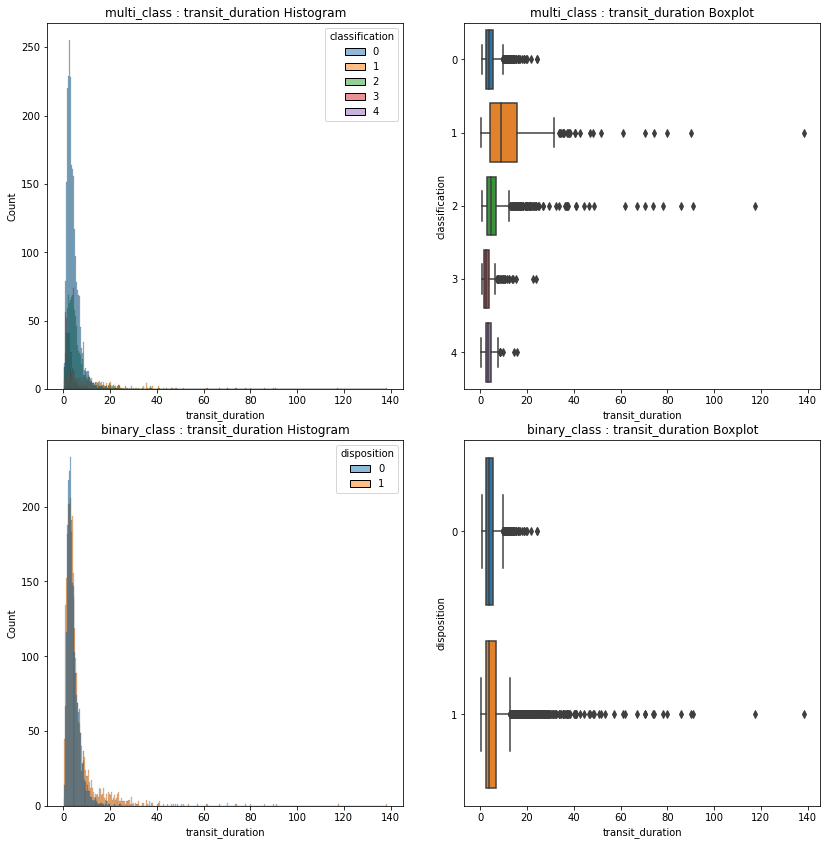

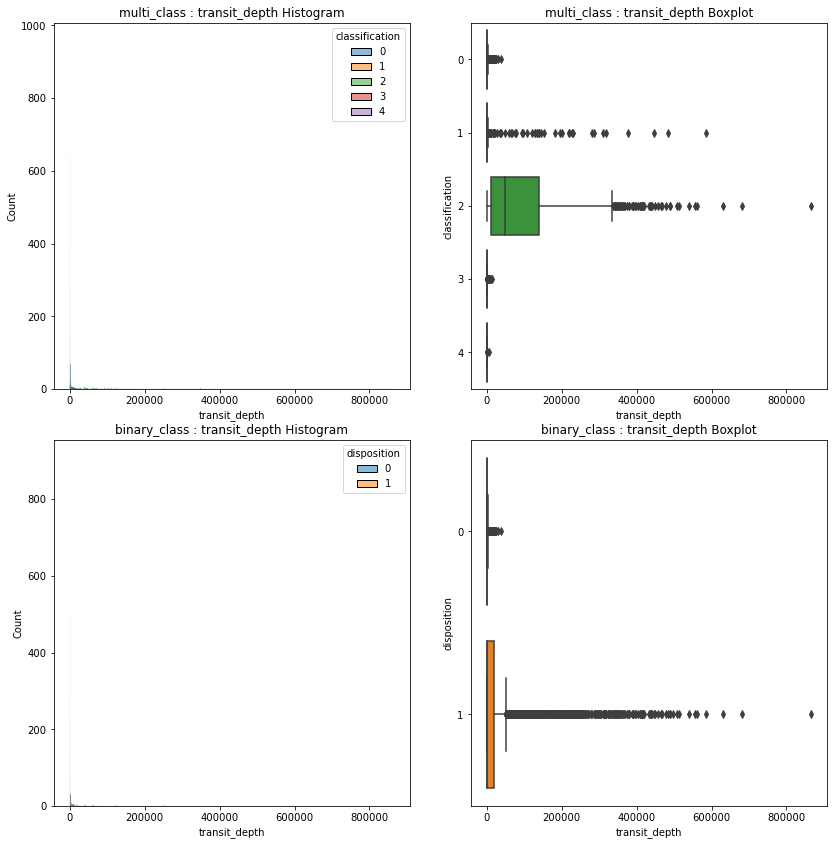

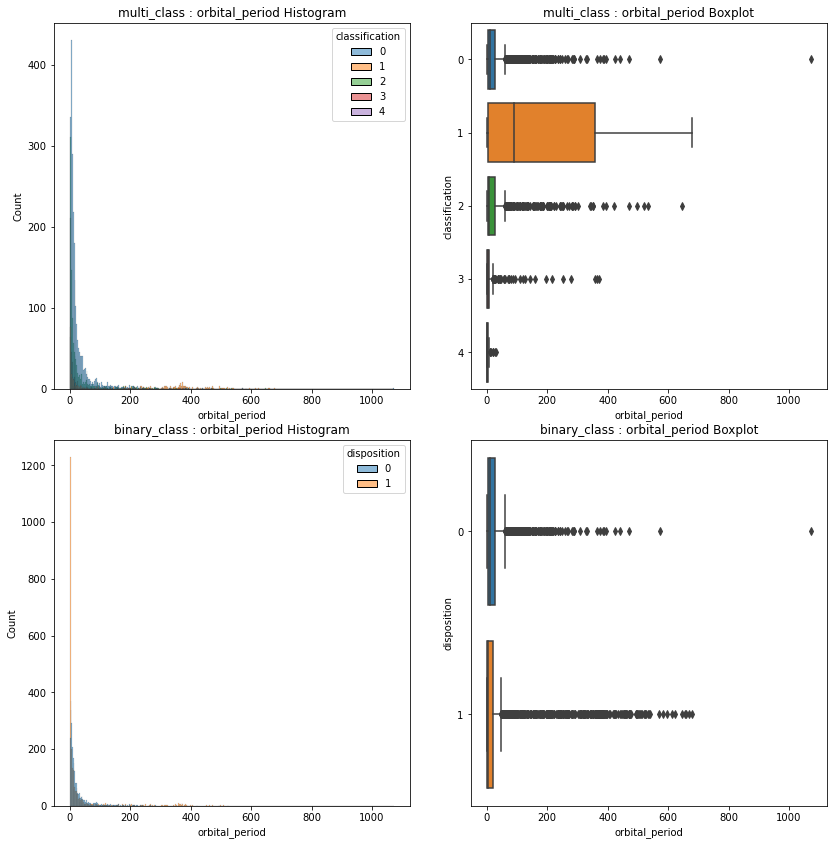

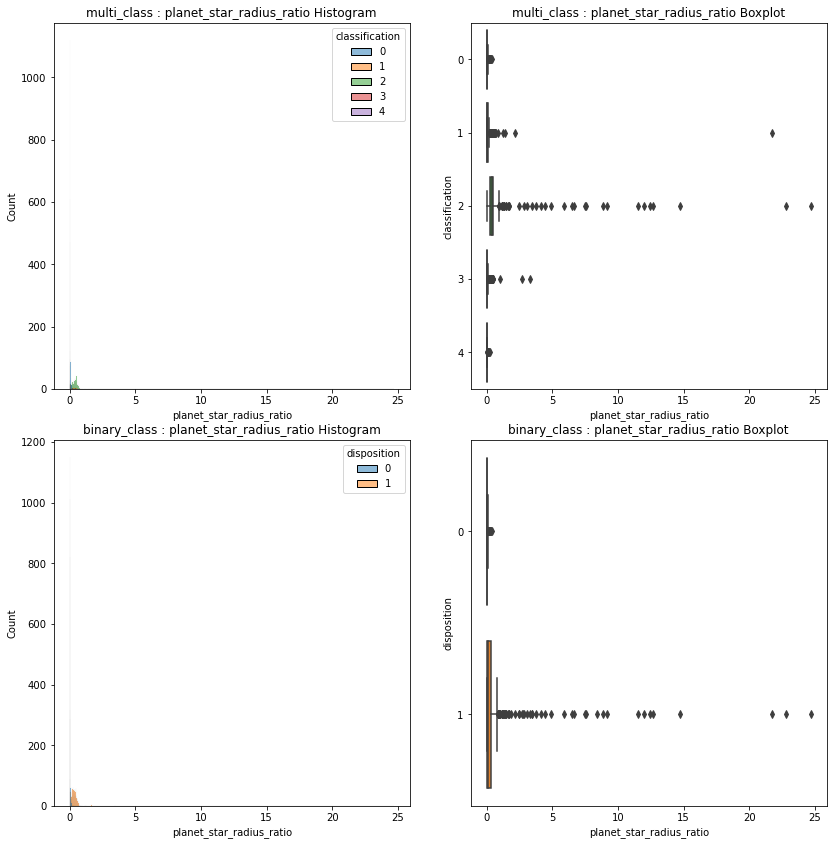

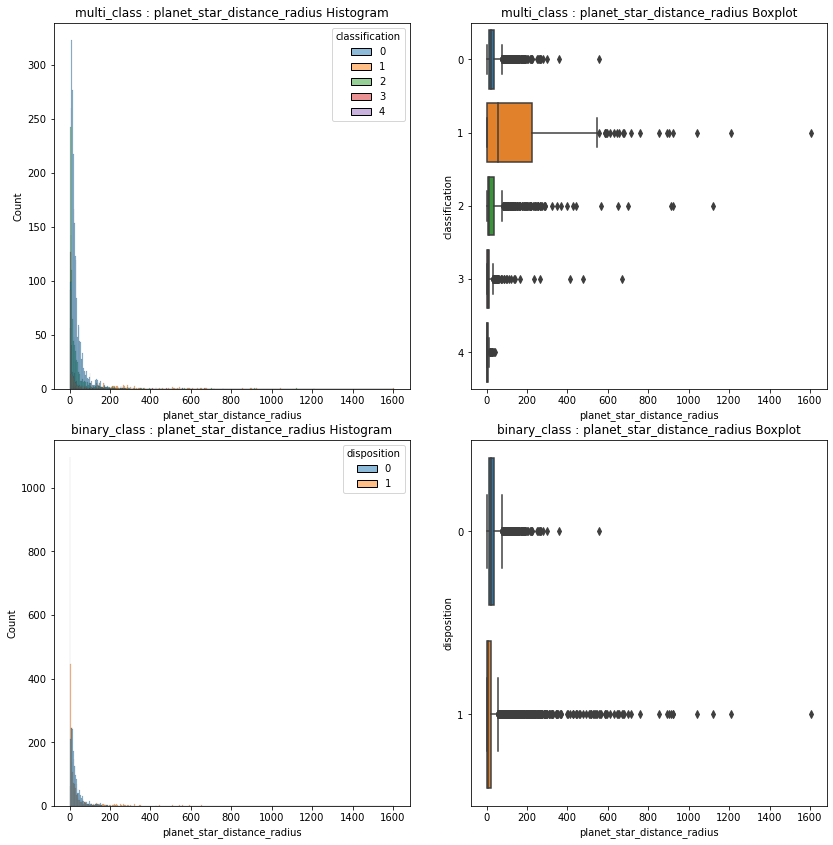

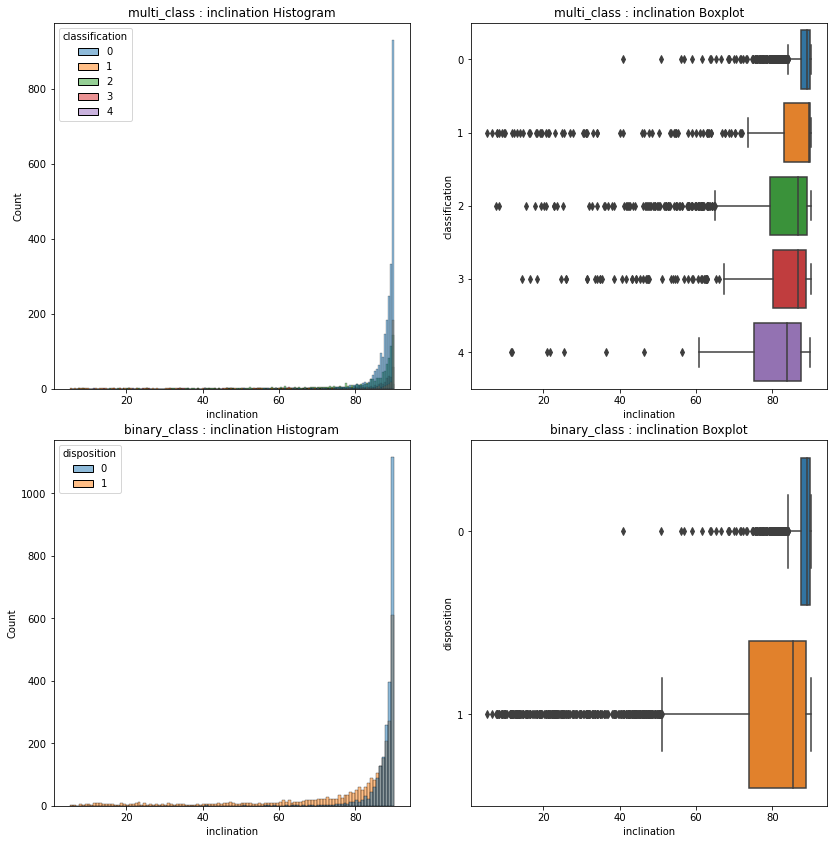

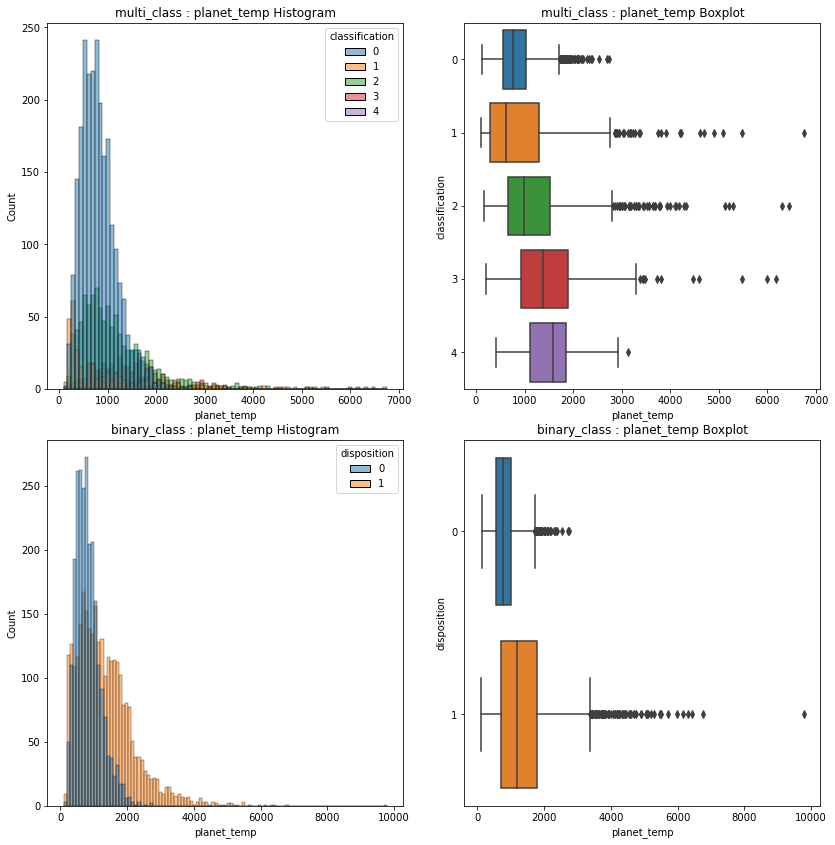

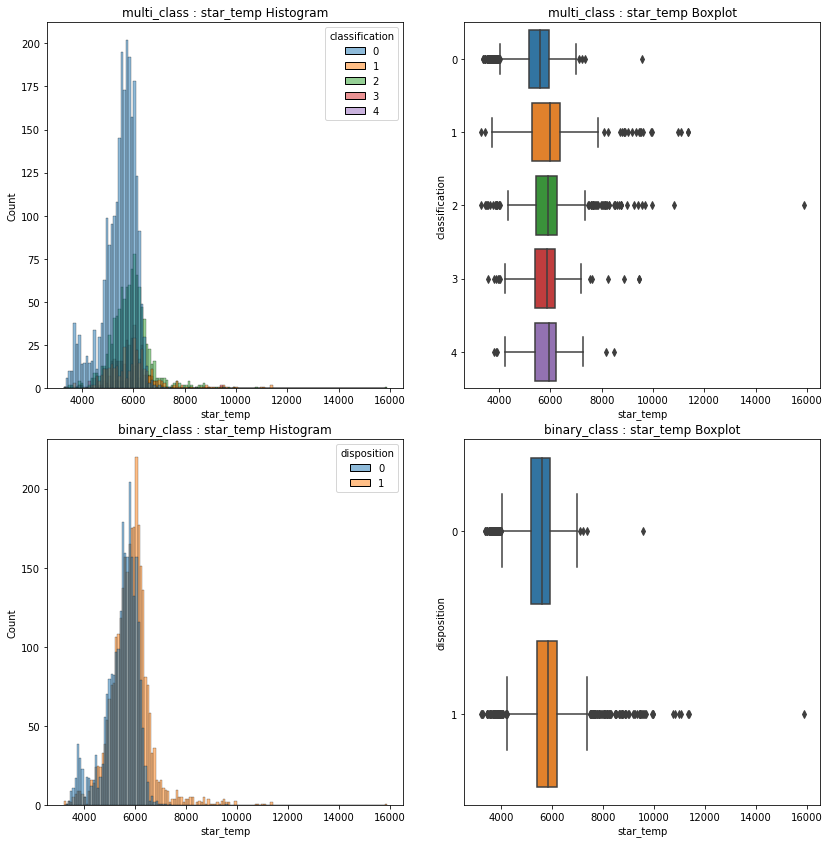

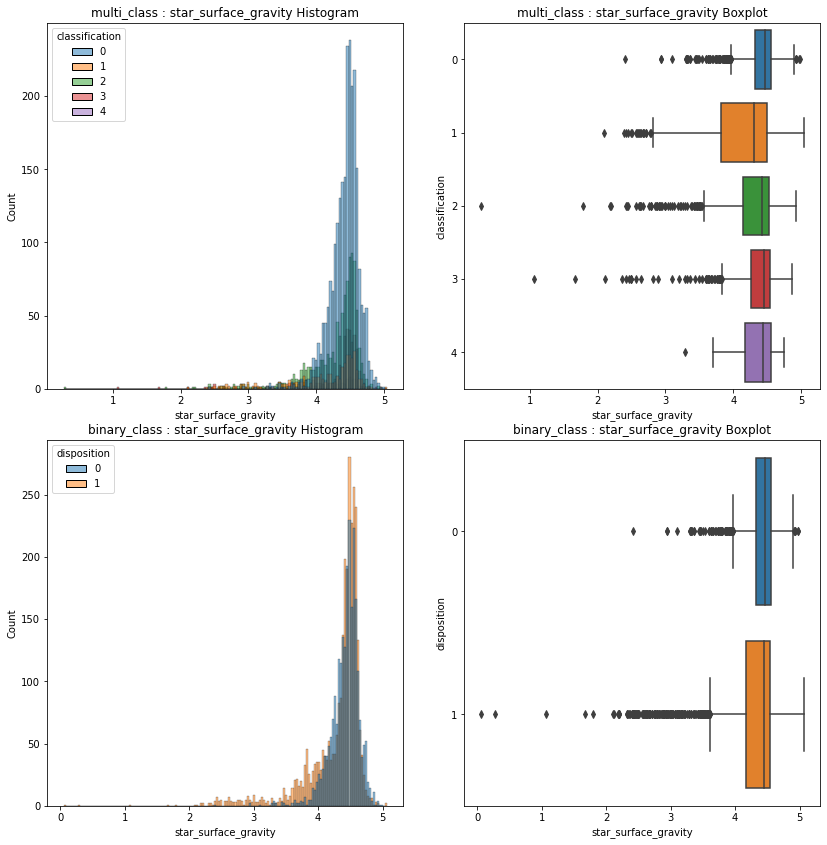

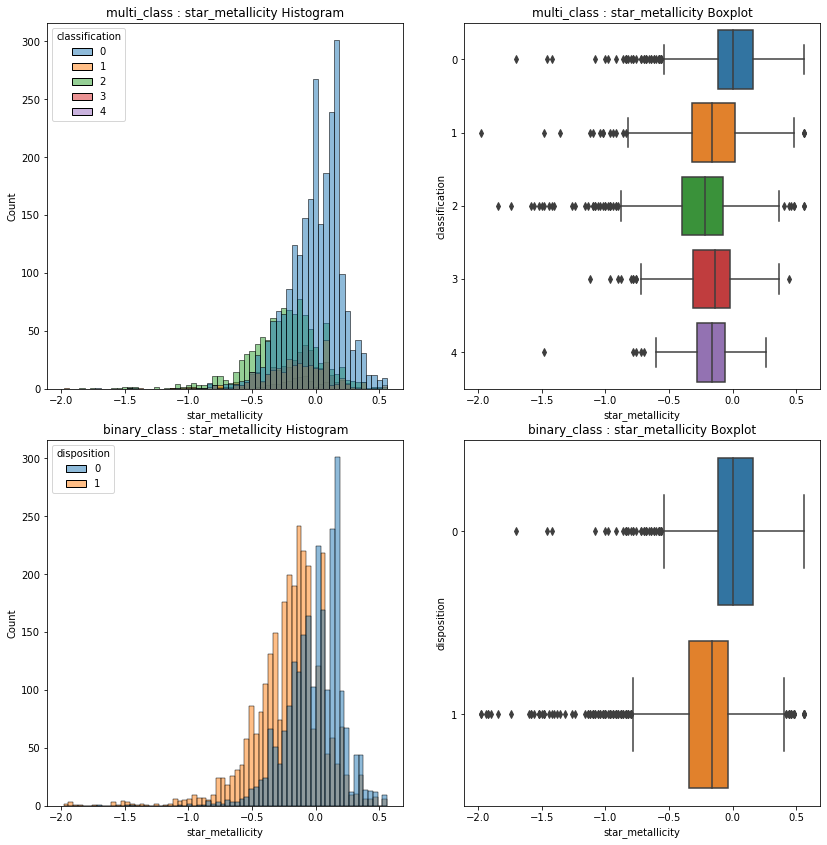

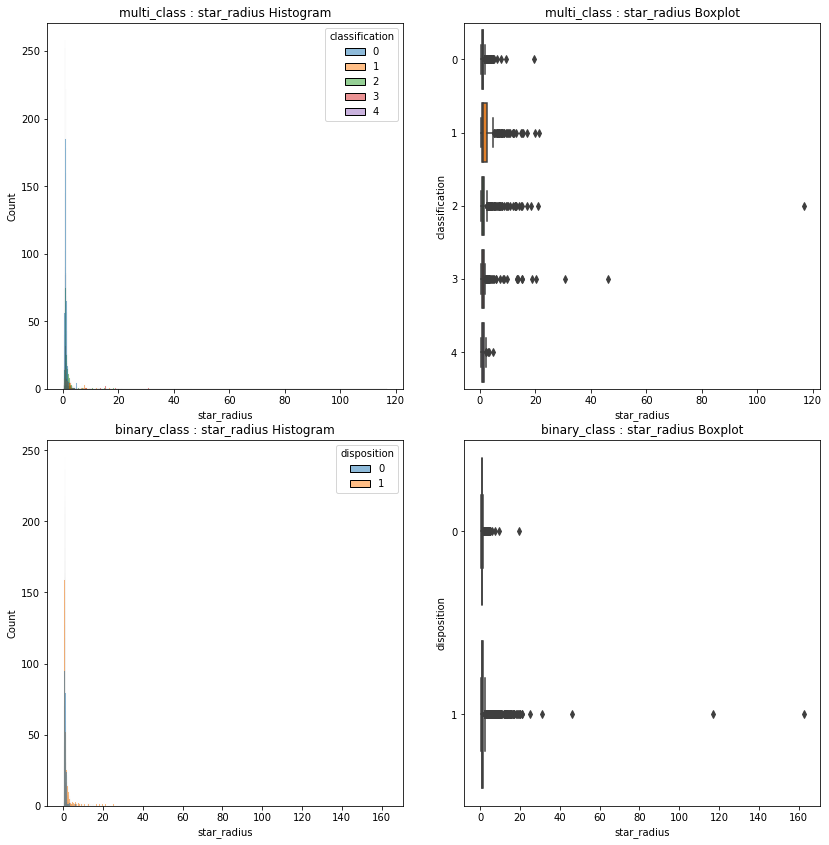

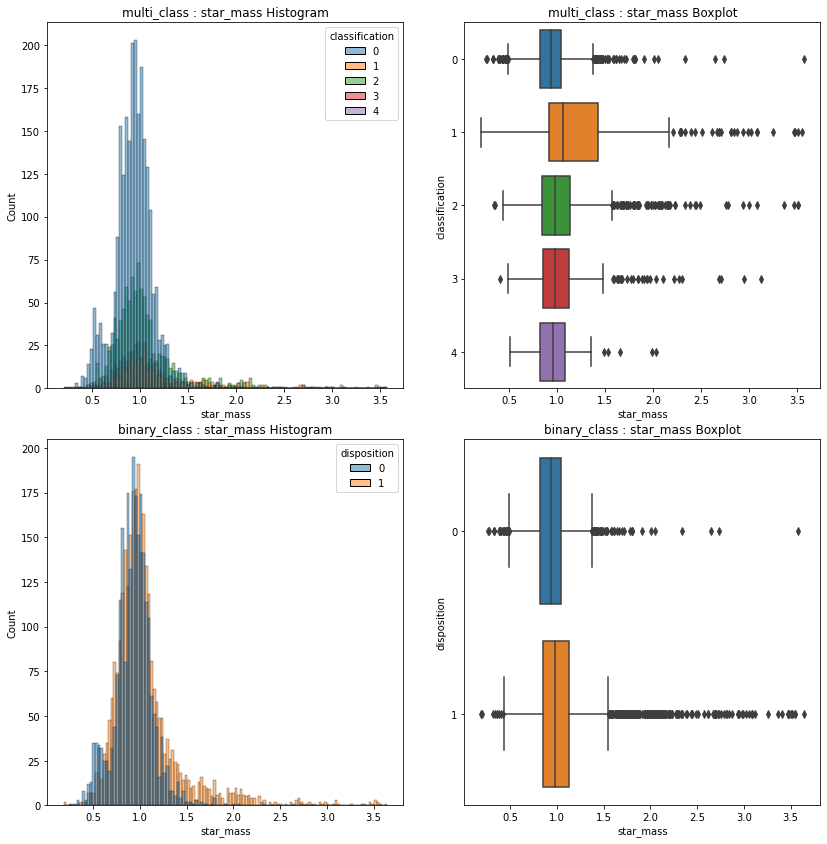

In [91]:
plt.close('all')
for column in numerical_columns[24:36]:
    plot_distributions([multi_class, binary_class], column, ['classification', 'disposition'], kde = False)

In [ ]:
plt.close('all')

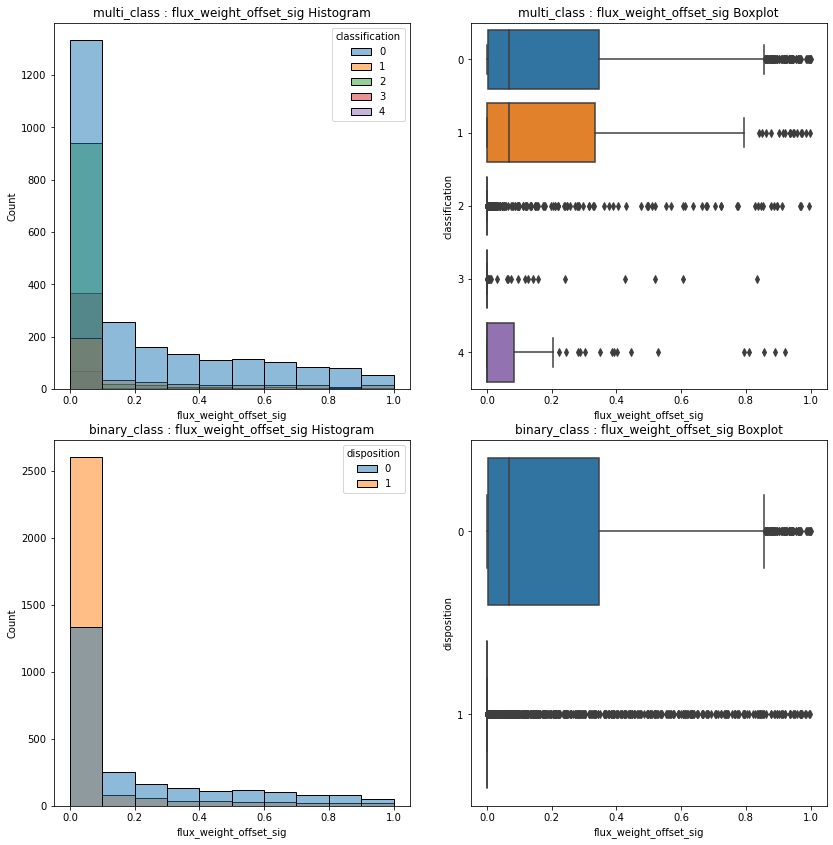

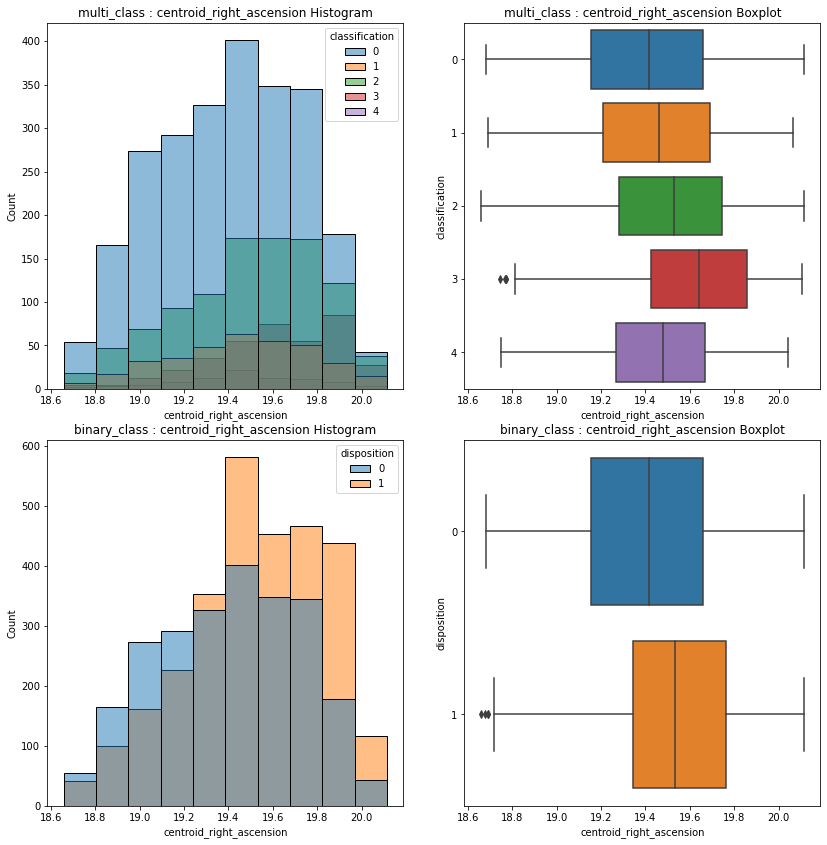

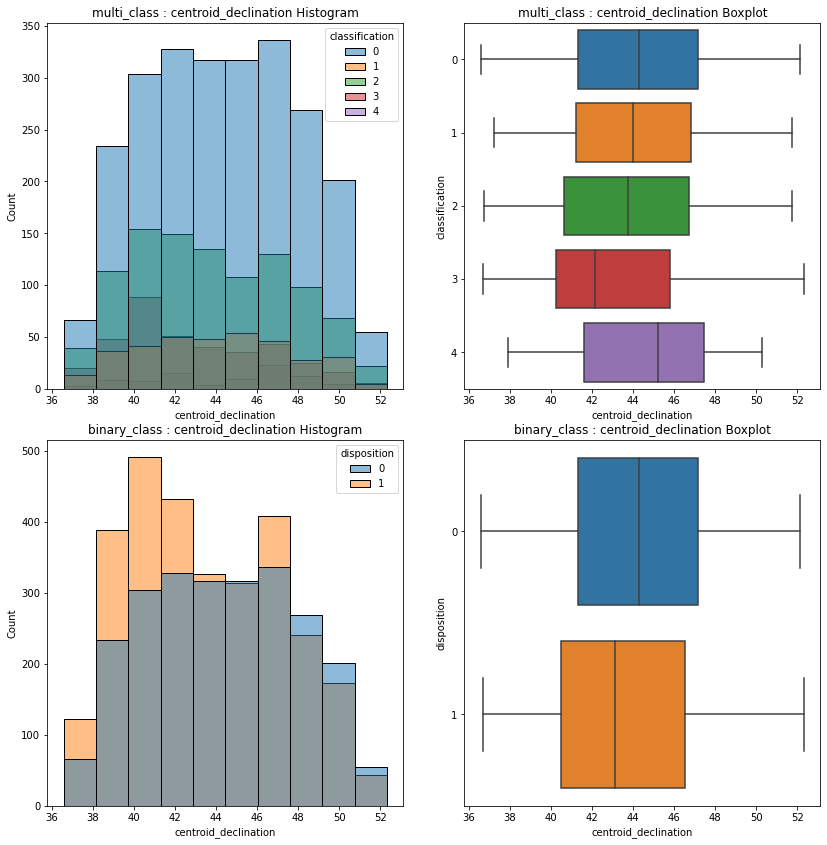

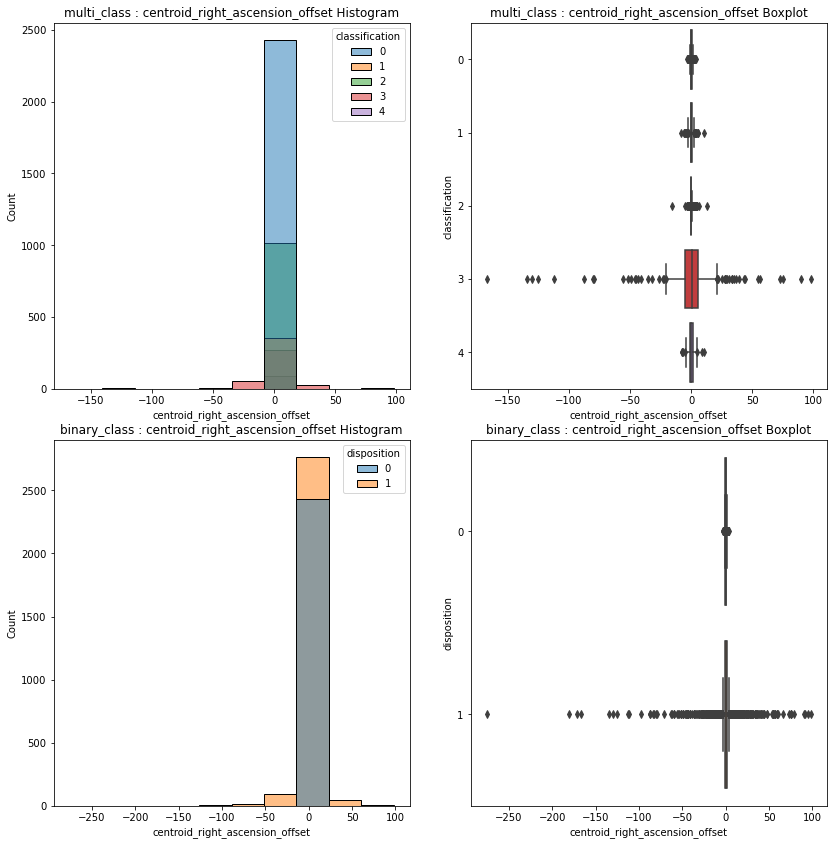

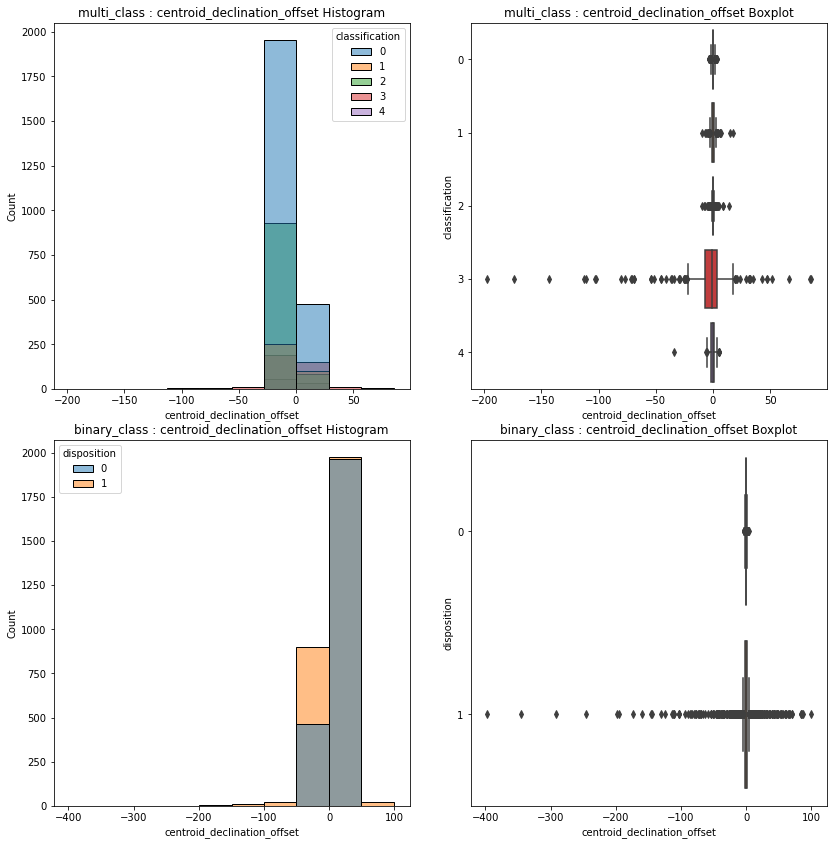

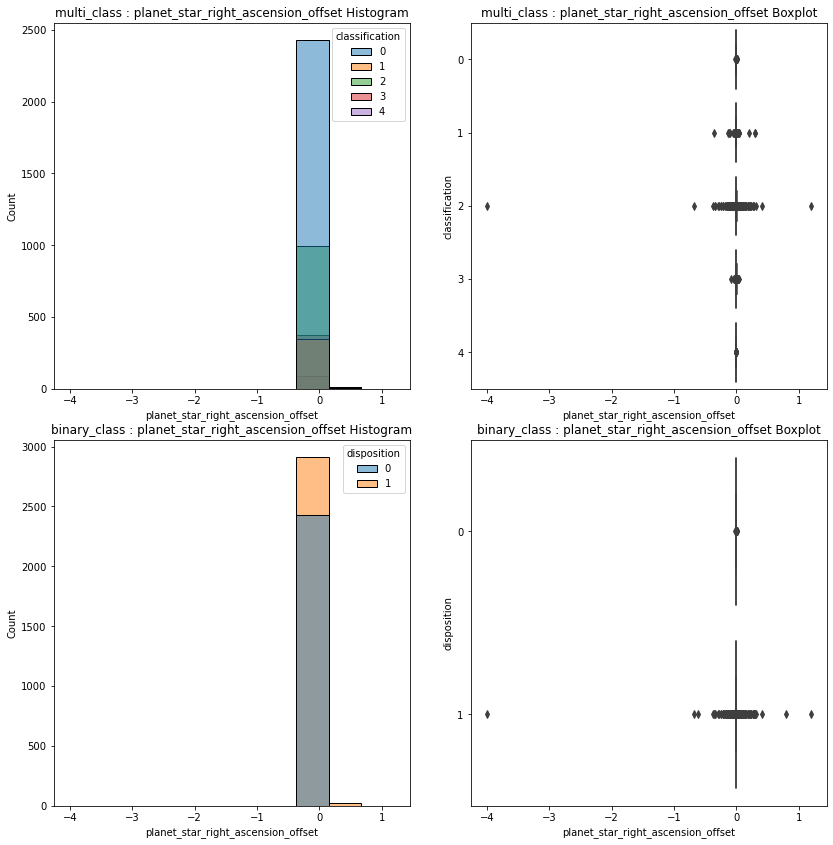

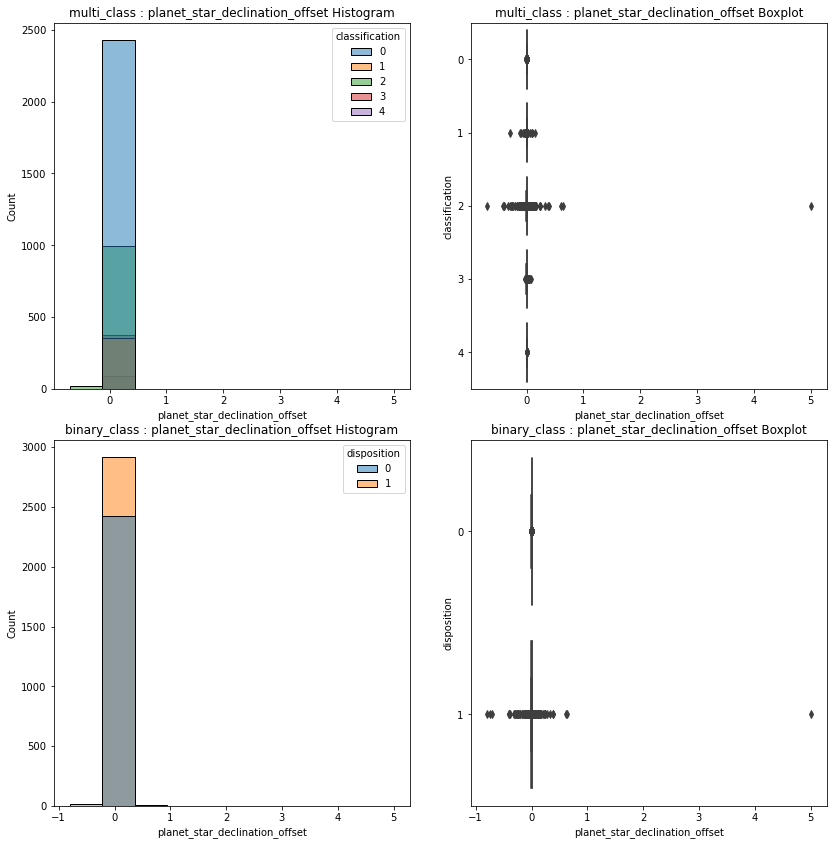

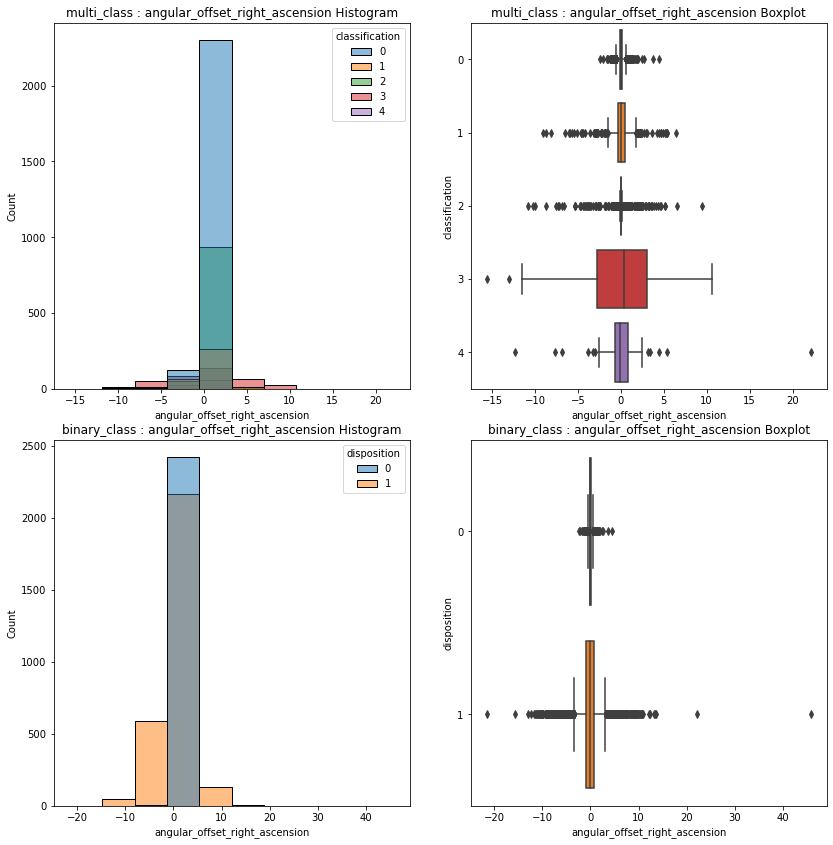

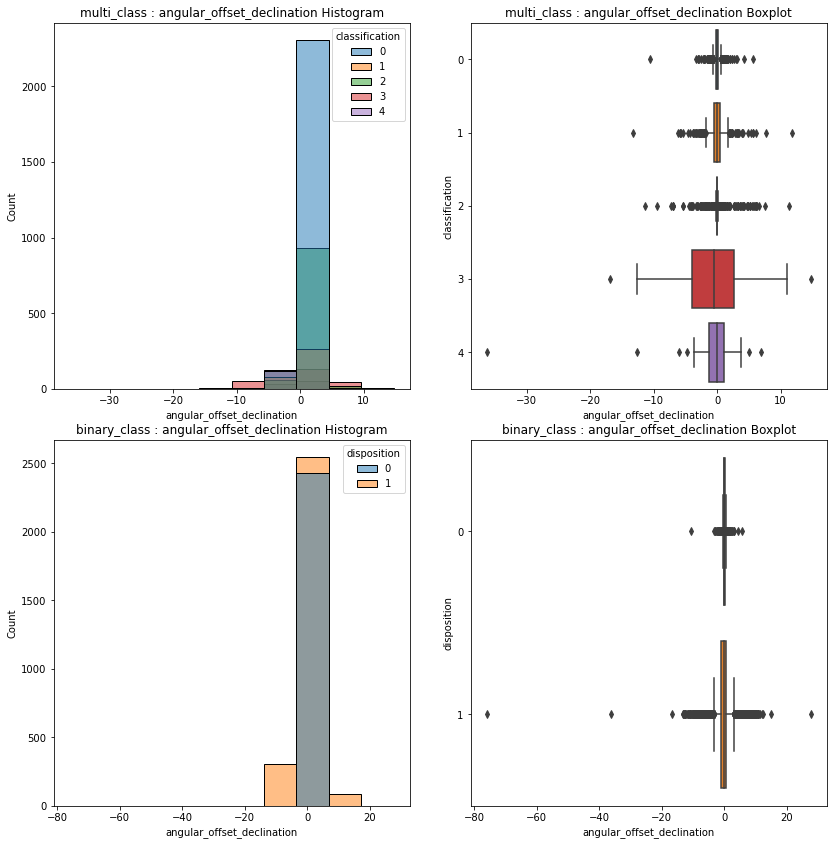

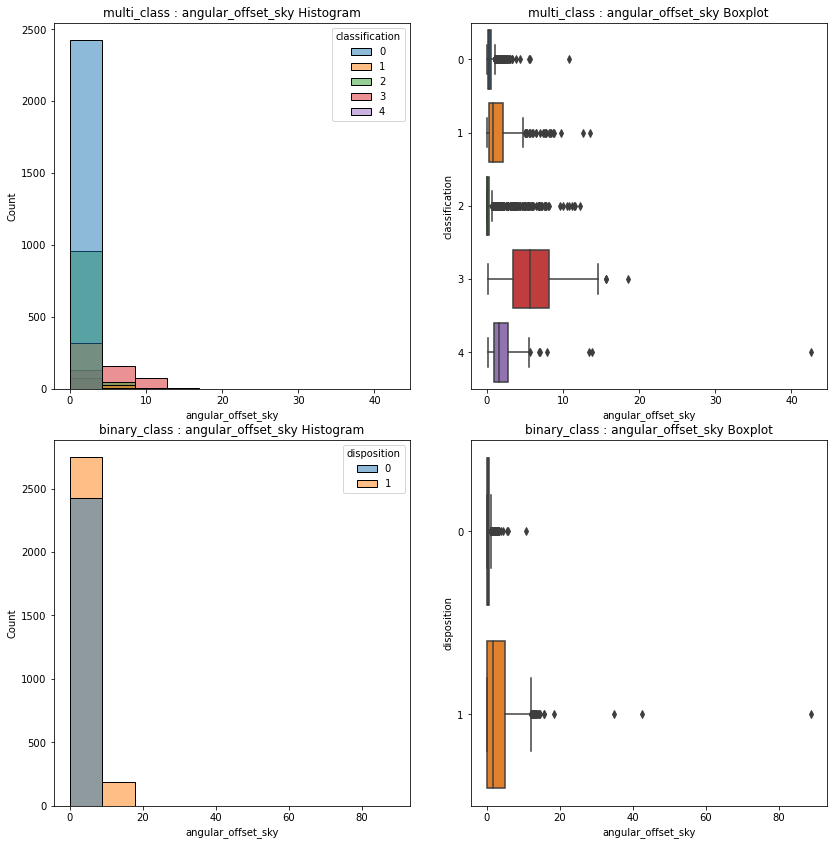

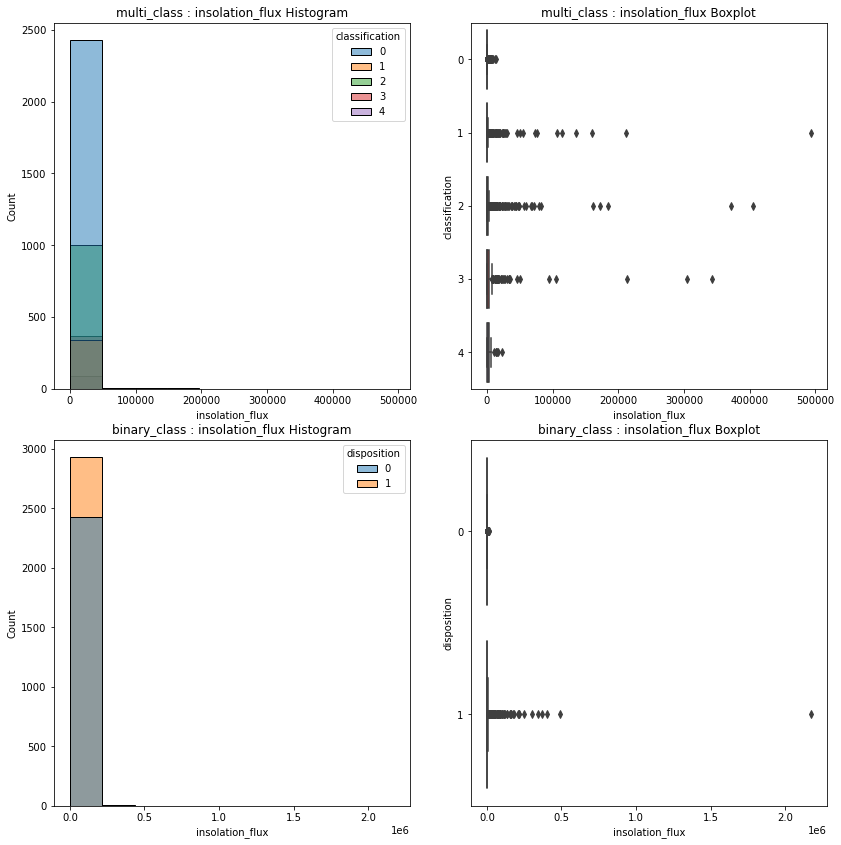

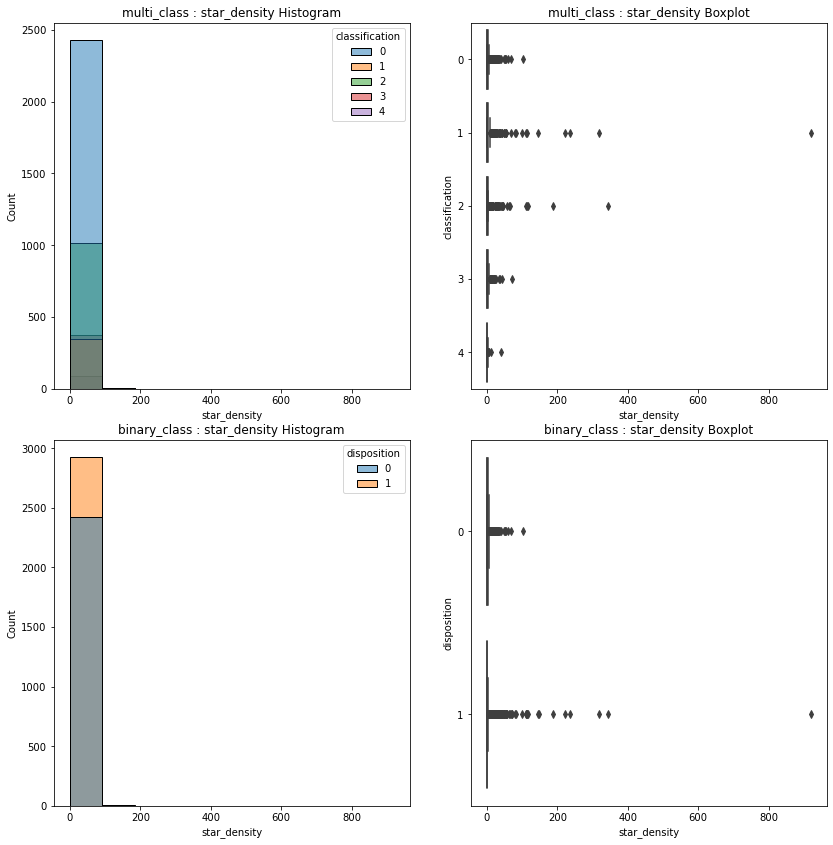

In [7]:
for column in numerical_columns[36:]:
    plot_distributions([multi_class, binary_class], column, ['classification', 'disposition'], kde = False, bins = 10)

In [81]:
multi_class.ml_fittype.value_counts()

LS+MCMC    4221
LS           39
Name: ml_fittype, dtype: int64

In [12]:
multi_class.groupby(['classification','ml_fittype']).count().iloc[:,:1]

num_of_objects_around_star
classification ml_fittype                            
0              LS+MCMC                           2427
1              LS                                  18
               LS+MCMC                            335
2              LS                                   5
               LS+MCMC                           1012
3              LS                                  12
               LS+MCMC                            362
4              LS                                   4
               LS+MCMC                             85

In [15]:
multi_class.classification.value_counts()

0    2427
2    1017
3     374
1     353
4      89
Name: classification, dtype: int64